<a href="https://colab.research.google.com/github/robertej19/MLEKG/blob/main/MLEKG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6.8300/6.8301 Network Interpretability and Training


In this problem set, we will begin by examining how we can visualize the learned features of a pretrained image classifier to better understand how it makes a decision when classifying a particular scene.

Then, you'll train your own simple image classifier and work to improve its performance as much as you can.


# Requirements installation


First, let's install everything needed to run this notebook


In [ ]:
!pip install Pillow
!pip install -U image
!pip install opencv-python
!pip install tqdm
!pip install torch
!pip install torchvision

from tqdm import tqdm
from io import BytesIO

import cv2
import numpy as np
import PIL.Image
from IPython.display import Image, clear_output, display

# PyTorch will be out main tool for playing with neural networks
import torch
import torch.hub
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models, datasets, transforms

# For reproducibility
torch.manual_seed(1234)

# CPU / GPU
device = torch.device('cpu')
if torch.cuda.is_available():
    device = torch.device('cuda:0')

# Download function for model
import requests
def download(url, fn=None):
    if fn is None:
        fn = url.split('/')[-1]
    r = requests.get(url)
    if r.status_code == 200:
        open(fn, 'wb').write(r.content)
        print("{} downloaded: {:.2f} KB".format(fn, len(r.content) / 1024.0))
    else:
        print("url not found:", url)



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 15.2 MB/s eta 0:00:00
  Created wheel for image: filename=image-1.5.33-py2.py3-none-any.whl size=19497 sha256=cedf9c12414ba3f23f9946d778c45fb7d5b6328e655cde7187914bd52aca1c2c
  Stored in directory: /root/.cache/pip/wheels/14/4c/7c/d9b5c35a149d3bc8c72c7e92372913ff7dac9c6bd94bd1b8c9
Successfully built image
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


We will load PyTorch, our main tool to play with neural networks.


# Loading Images and PyTorch models


Once, we have loaded all the relevant libraries, we will load the model. We will begin with a scene classification model trained on the Places dataset with a ResNet-50 architecture.

![texto alternativo](https://www.codeproject.com/KB/AI/1248963/resnet.png)


In [ ]:
# Download the pretrained weights
download('http://places2.csail.mit.edu/models_places365/resnet50_places365.pth.tar')

# Initialize the model
resnet = models.resnet50(num_classes=365)

# Load the model
sd = torch.load('resnet50_places365.pth.tar', map_location=device)['state_dict']

# Don't worry about this -- when you train a model using parallelism, the
# weights begin with model. We have 1 cpu/gpu, so we will fix the name keys
sd = {k.replace('module.', ''): v for k, v in sd.items()}

# Load weights into network
resnet.load_state_dict(sd)

# Important: put network into evaluation mode
# Some networks have layers that do not behave the same during train/eval
# Forgetting this is a very common source of bugs
resnet.eval()

resnet50_places365.pth.tar downloaded: 94990.39 KB


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

# Problem 1: Visualizing Network Filters


Now, let's write a function to visualize the filters. You have to complete the following code, with one line normalizing the filter values:


torch.Size([64, 3, 7, 7])
Visualizing conv1 filter 0


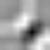

Visualizing conv1 filter 1


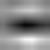

Visualizing conv1 filter 2


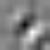

Visualizing conv1 filter 3


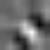

Visualizing conv1 filter 4


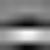

Visualizing conv1 filter 5


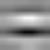

Visualizing conv1 filter 6


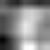

Visualizing conv1 filter 7


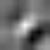

Visualizing conv1 filter 8


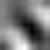

Visualizing conv1 filter 9


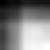

Visualizing conv1 filter 10


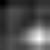

Visualizing conv1 filter 11


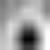

Visualizing conv1 filter 12


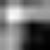

Visualizing conv1 filter 13


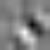

Visualizing conv1 filter 14


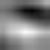

Visualizing conv1 filter 15


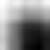

Visualizing conv1 filter 16


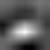

Visualizing conv1 filter 17


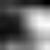

Visualizing conv1 filter 18


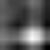

Visualizing conv1 filter 19


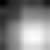

Visualizing conv1 filter 20


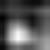

Visualizing conv1 filter 21


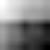

Visualizing conv1 filter 22


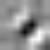

Visualizing conv1 filter 23


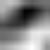

Visualizing conv1 filter 24


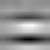

Visualizing conv1 filter 25


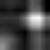

Visualizing conv1 filter 26


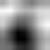

Visualizing conv1 filter 27


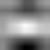

Visualizing conv1 filter 28


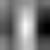

Visualizing conv1 filter 29


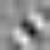

In [ ]:
def showarray(a, fmt='jpeg'):
    ''' Helper function. Use this to show your filters
    
    Converting to standard image format is a common task that produces garbage
    images when not done correctly. We've provided the correct conversions'''
    a = np.uint8(np.clip(a, 0, 255))
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

def normalize_tensor(tensor):
    # TODO (1a): Normalize between 0 and 255, format as np.uint8

    #Normalize as 
    range = tensor.max() - tensor.min()
    pedestal_subtracted = tensor - tensor.min()
    normalized_array = pedestal_subtracted/range*255

    normalized_array_uint8 = normalized_array.numpy().astype(np.uint8)

    return normalized_array_uint8

print(resnet.conv1.weight.data.size())  # Print the size of conv1 weights

# Display the filters of the initial convolutional layer:
for i in range(30):
    print('Visualizing conv1 filter', i)
    weight = resnet.conv1.weight.data[i, 0, :, :]
    normed = normalize_tensor(weight)

    # Resize
    normed = cv2.resize(normed, (50, 50))
    showarray(normed)


## 1b Exercise: Visualize filters for another convolutional layer in ResNet


Visualizing conv1 filter 0


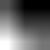

Visualizing conv1 filter 1


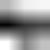

Visualizing conv1 filter 2


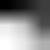

Visualizing conv1 filter 3


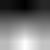

Visualizing conv1 filter 4


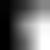

Visualizing conv1 filter 5


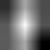

Visualizing conv1 filter 6


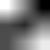

Visualizing conv1 filter 7


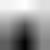

Visualizing conv1 filter 8


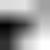

Visualizing conv1 filter 9


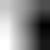

Visualizing conv1 filter 10


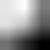

Visualizing conv1 filter 11


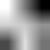

Visualizing conv1 filter 12


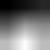

Visualizing conv1 filter 13


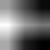

Visualizing conv1 filter 14


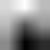

Visualizing conv1 filter 15


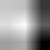

Visualizing conv1 filter 16


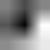

Visualizing conv1 filter 17


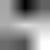

Visualizing conv1 filter 18


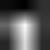

Visualizing conv1 filter 19


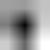

Visualizing conv1 filter 20


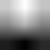

Visualizing conv1 filter 21


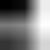

Visualizing conv1 filter 22


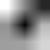

Visualizing conv1 filter 23


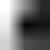

Visualizing conv1 filter 24


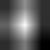

Visualizing conv1 filter 25


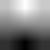

Visualizing conv1 filter 26


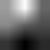

Visualizing conv1 filter 27


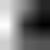

Visualizing conv1 filter 28


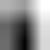

Visualizing conv1 filter 29


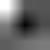

In [ ]:
# TODO (1b): pick a different layer to analyze

for i in range(30):
   print('Visualizing conv1 filter', i)
   # Display the filters of the following layer:
   weight = resnet.layer1[0].conv2.weight.data[i,0 , :, :]
   normed = normalize_tensor(weight)

   # Resize
   normed = cv2.resize(normed, (50, 50))
   showarray(normed)

# Predicting classes with a pre-trained model


To make the process easier to read, we will load the label <--> index assignment for the Places dataset and one image to use throughout the pset


rio.jpg downloaded: 178.28 KB


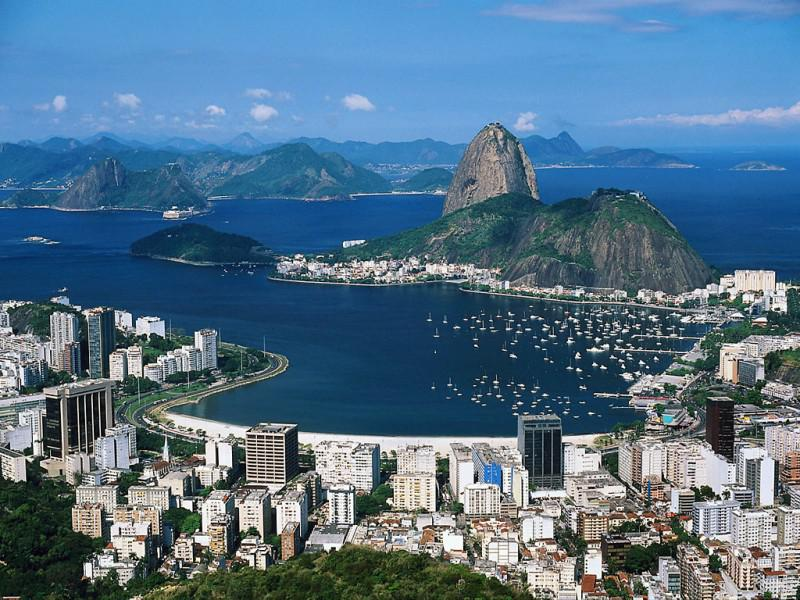

In [ ]:
from urllib.request import urlopen

synset_url = 'http://gandissect.csail.mit.edu/models/categories_places365.txt'
classlabels = [
    r.split(' ')[0][3:] for r in urlopen(synset_url).read().decode('utf-8').split('\n')
]


from torchvision import transforms

download('http://6.869.csail.mit.edu/fa19/miniplaces_part1/rio.jpg')
img_pil = PIL.Image.open('rio.jpg').convert('RGB')
img_numpy = np.array(img_pil)
showarray(img_numpy)

First, let's take a look at the raw prediction of the model.


In [ ]:
# data preprocessing: resize an image, change it from a PIL image to a pytorch tensor, normalize it according to dataset statistics
center_crop = transforms.Compose(
    [
        transforms.Resize((227, 227)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]
)

# our model can only take input that is preprocessed, so preprocess our loaded image
img_tensor = center_crop(img_pil)
logits = resnet(img_tensor.unsqueeze(0)).squeeze()
# get the indices associated with the topk logits
categories = logits.topk(5)[1]

# print the labels corresponding to the topk indices
print(categories)
print(', '.join([classlabels[cat] for cat in categories]))


tensor([348, 194,  49,  97, 171])
village, islet, beach_house, coast, harbor


# Problem 2: Visualizing Internal Activations of the Network

Let's look at what parts of the image cause different units to activate (send some positive signal). All of these activations combine to inform the final inference.

The convolutional layers of ResNet essentially make a semantic representation of what is contained in the image. This is followed by two fully connected layers, which use the information from that representation to categorize the image.

So, let's remove the last few layers (which do classification) to get the underlying representation, and we'll visualize the activations that went into that representation from different units


In [ ]:
def generate_featuremap_unit(model_cut, unit_id, im_input):
    # Extract activation from model
    # Mark the model as being used for inference
    model_cut.eval()
    # Crop the image
    im = center_crop(im_input)
    # Place the image into a batch of size 1, and use the model to get an intermediate representation
    activations = model_cut(im.unsqueeze(0))
    # Print the shape of our representation
    print(activations.size())
    # Extract the only result from this batch, and take just the `unit_id`th channel
    # Return this channel
    return activations.squeeze()[unit_id]

def visualize_featuremap(im_input, feature_map, alpha=0.3):
    # Normalize to [0..1], with a little leeway (0.9999) in case feature_map has 0 range
    feature_map = feature_map / (feature_map.max() + 1e-10)
    # Convert to numpy (detach() just seperates a tensor from the gradient)
    feat_numpy = feature_map.detach().numpy()
    # Resize the feature map to our original image size (our strided conv layers reduce the size of the image)
    feat_numpy = cv2.resize(feat_numpy, (im_input.shape[1], im_input.shape[0]))
    # Invert to make the heatmap look more natural
    map_t = 1 - feat_numpy
    # Add an extra dimension to make this a [H,W,C=1] image
    feat_numpy = np.expand_dims(feat_numpy, axis=2)

    # Convert to image (UINT8 from 0-255)
    map_t = 255 * map_t
    map_t = map_t.astype(np.uint8)
    # Use a color map to change this from BW to a nice color
    map_t = cv2.applyColorMap(map_t, cv2.COLORMAP_JET)
    # Combine the heatmap with the original image so you can see which section of the image is activated
    im_final = np.multiply((alpha * im_input + (1 - alpha) * map_t), feat_numpy) + np.multiply(
        im_input, 1 - feat_numpy
    )
    # Return final visualization
    return im_final


def remove_last_layers(model, num_layers=2):
    # TODO (2a): remove the last 2 layers of resnet
    # Note: the .children() function of nn.Module
    # (which resnet50 inherits from) and nn.Sequential() will be useful

    #Helpful syntax from https://stackoverflow.com/questions/52548174/how-to-remove-the-last-fc-layer-from-a-resnet-model-in-pytorch
   
    list_of_children = list(model.children())

    model = torch.nn.Sequential(*list_of_children[:-num_layers])

    return model


model_cut = remove_last_layers(resnet, num_layers=2)

Unit is 300
torch.Size([1, 2048, 8, 8])


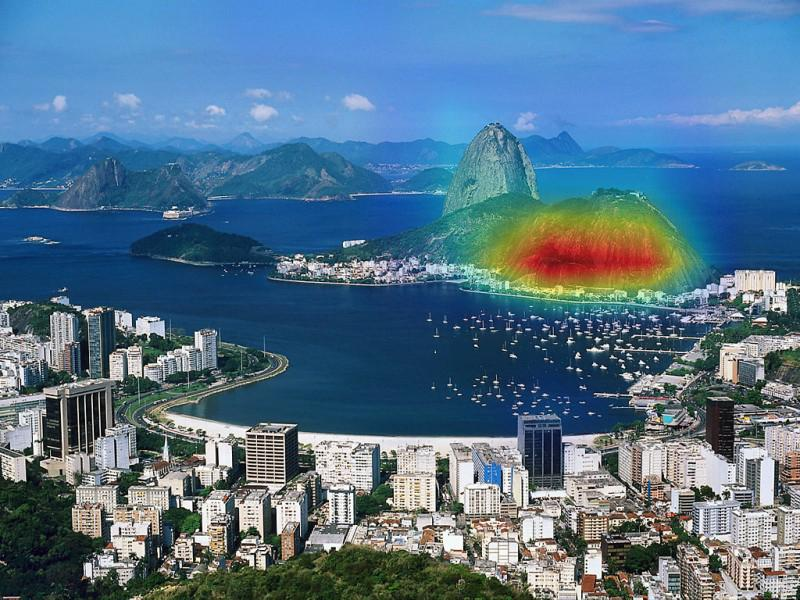

Unit is 544
torch.Size([1, 2048, 8, 8])


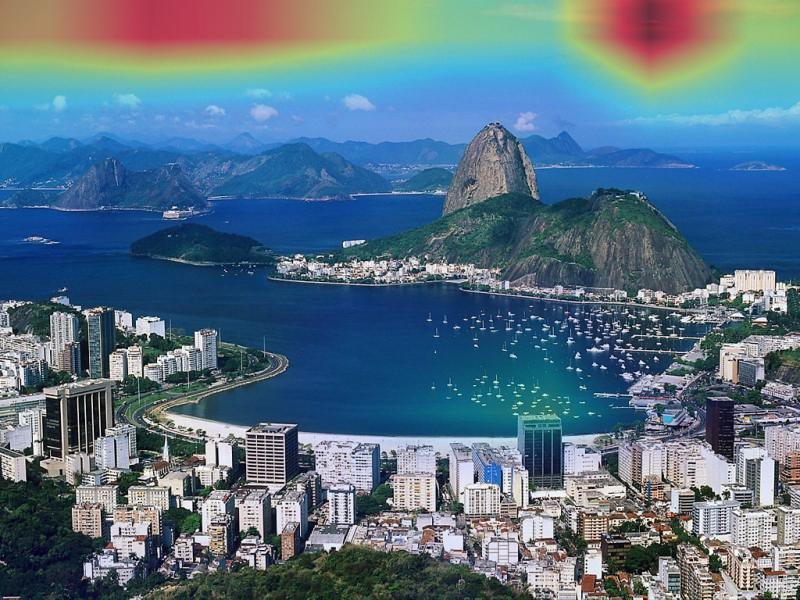

Unit is 768
torch.Size([1, 2048, 8, 8])


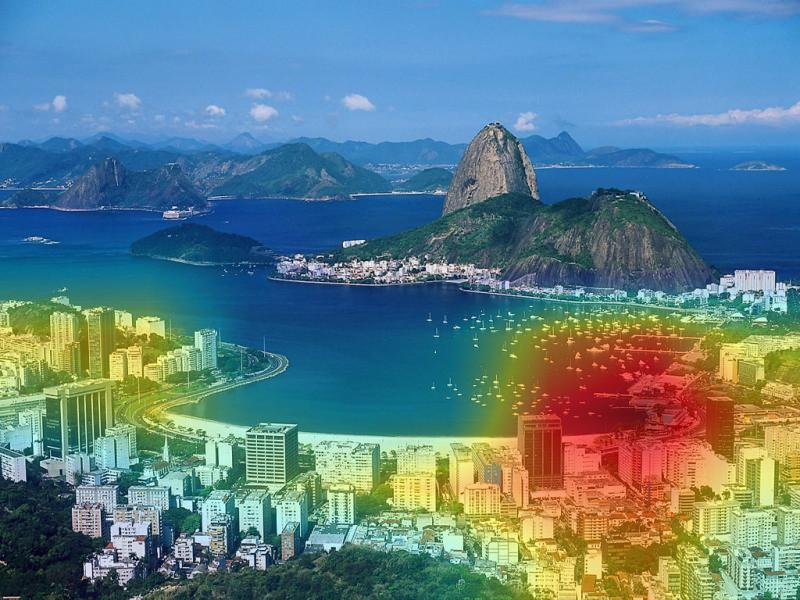

In [ ]:
# TODO (2b): search for mountain, sky, and building units by trying out different values of unit_id
# Fill in these variables with ints
unit_mountain = 300

#I scanned through each of the first ~1200 units, colab kept crashing as I tried to inspect higher
#So I didn't see every single unit between 1200 and 2048, only randomly selected ones
#The best handful are as written, and the top 2 in particular are selected.
best_sky_units = [5,13,68,85,110,141,145,410,413,419,544,567,682,741,1057]
best_building_units = [10,71,149,292,327,548,768]

unit_sky      = 544 #567 is also good ## I'm interpreting "sky" to mean "sky" not "clouds"
unit_building = 768 #10 is also good

best_units = [unit_mountain,unit_sky,unit_building]
# Use this to test
for best_unit in best_units:
  print("Unit is {}".format(best_unit))
  feat = generate_featuremap_unit(model_cut, best_unit, img_pil)
  im_final = visualize_featuremap(img_numpy, feat)
  showarray(im_final)


Original top 5 class names  ['village', 'islet', 'beach_house', 'coast', 'harbor']
Original top 5 class values  [8.457634  8.360574  7.7587166 6.94687   6.7943234]
Modified top 5 class names  ['islet', 'beach_house', 'village', 'coast', 'harbor']
Modified top 5 class values  [8.071368  7.2446146 7.2041817 6.5970626 6.4877353]


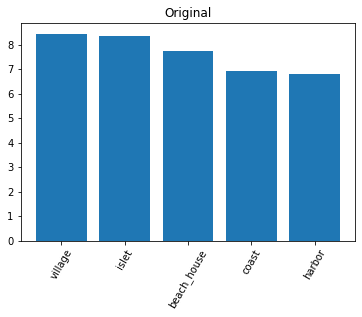

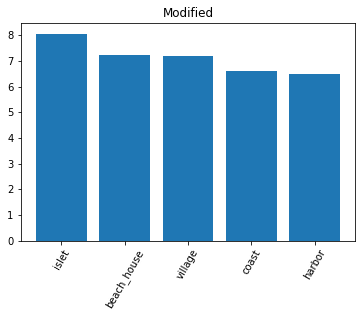

In [ ]:
# TODO (2c -- required for 6.8300 only) Find the unit index that has the maximum weights
# in the fully connected layer and deactivate that unit.
# Compare the orginal prediction and the new prediction
import matplotlib.pyplot as plt

out_original = resnet(img_tensor.unsqueeze(0)).squeeze() # original prediction
class_ids = np.argsort(-out_original.data.cpu().numpy())[0]
index = torch.topk(resnet.fc.weight[class_ids, :], k=5)[1]
#The above are the top 5 units indexes

def deactivate_unit_activations(model_cut, image, unit_id):
    # TODO: Get the output features for this model. Feature shape should be (1, # units, H, W)
    features = model_cut(image.unsqueeze(0))

    # TODO: deactivate the unit index that has the maximum weights (Set all values for that unit to 0)
    features [:, unit_id, :, :] = 0

    # TODO: run the modified features through the last two layers of the original network
    #First get the last 2 layers
    list_of_children = list(resnet.children())
    second_to_last_layer = torch.nn.Sequential(list_of_children[-2])
    last_layer = torch.nn.Sequential(list_of_children[-1])
    #Now run through them, and flatten in between per the documentation
    out_1 = second_to_last_layer(features)
    out_2 = torch.flatten(out_1,1)
    out_3 = last_layer(out_2).squeeze()

    return out_3

out_modified = deactivate_unit_activations(model_cut, img_tensor, index)

def plot_top_classes(values, top_k=5, title=None):
    sorted_classes = np.argsort(-values)
    class_ids = sorted_classes[:top_k]
    class_names = [classlabels[it] for it in list(class_ids)]
    class_values = values[class_ids]
    print(title + " top 5 class names ", class_names)
    print(title + " top 5 class values ", class_values)
    plt.bar(class_names, class_values)
    plt.xticks(rotation=60)
    plt.title(title)
    
# TODO (2d -- required for 6.8300 only): Report the lowest number of dropped 
# units required to change the top prediction class
lowest_dropped_units = 1
#No change if k=0, as expected
#k=1 results in islet being slighly higher ranked than village, so I guess it's 1

plt.figure(0)
plot_top_classes(out_original.data.cpu().numpy(), title='Original')
plt.figure(1)
plot_top_classes(out_modified.data.cpu().numpy(), title='Modified')


Showing Feature Map of Unit 474
torch.Size([1, 2048, 8, 8])


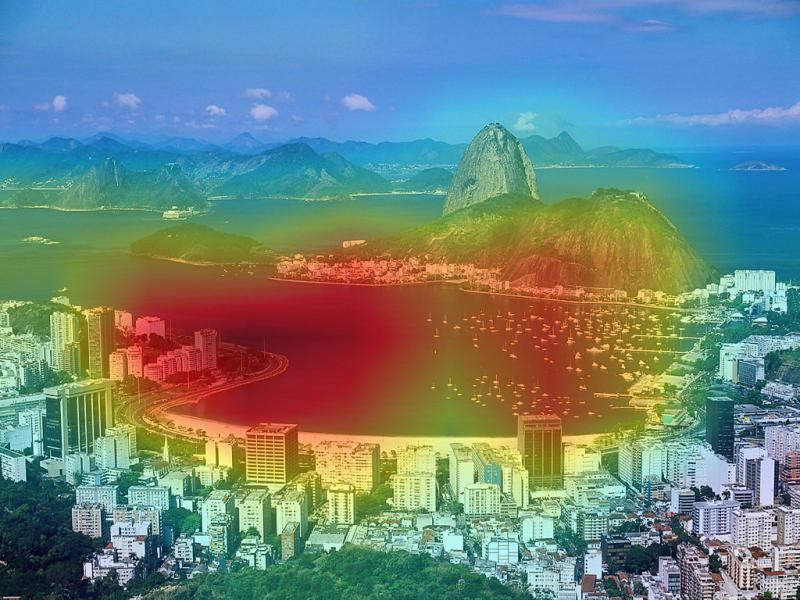

Showing Feature Map of Unit 969
torch.Size([1, 2048, 8, 8])


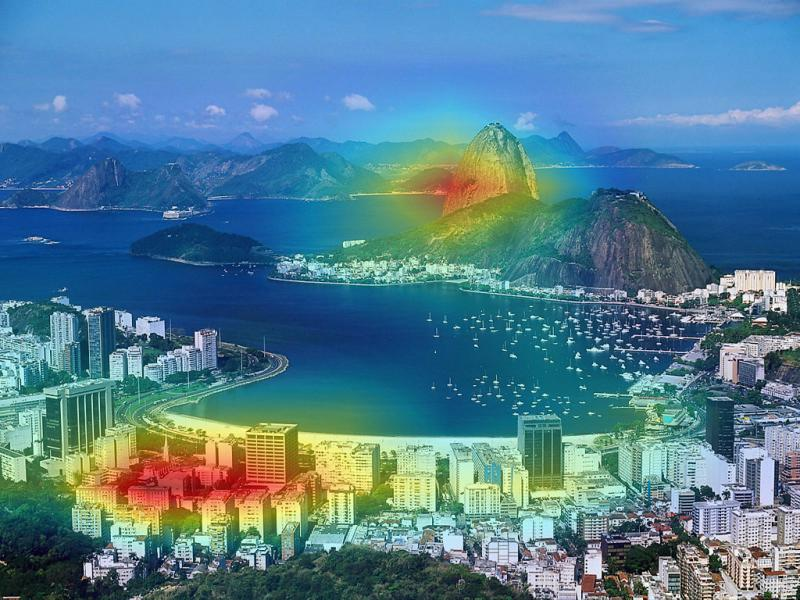

Showing Feature Map of Unit 1789
torch.Size([1, 2048, 8, 8])


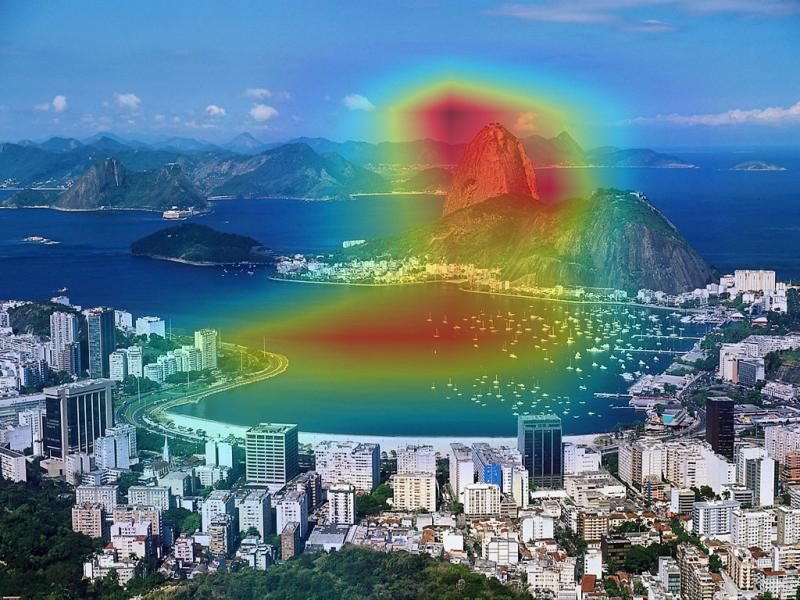

Showing Feature Map of Unit 330
torch.Size([1, 2048, 8, 8])


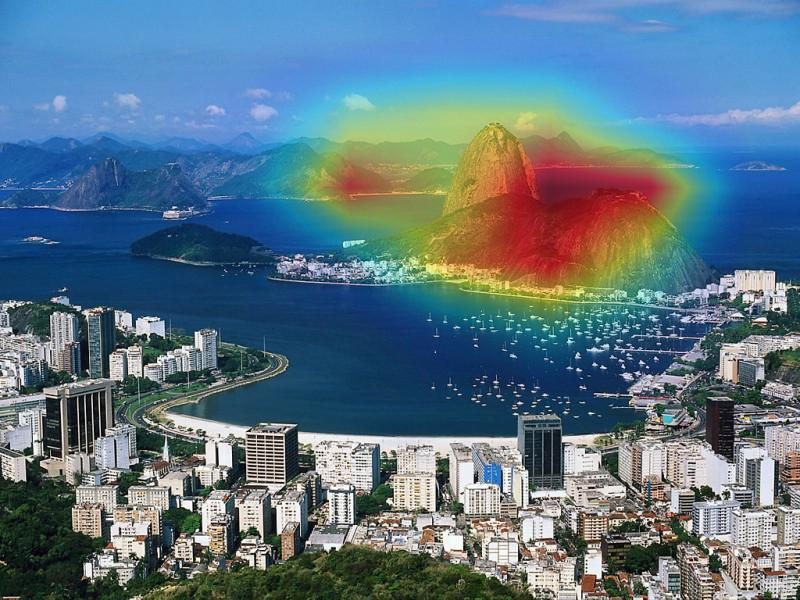

Showing Feature Map of Unit 768
torch.Size([1, 2048, 8, 8])


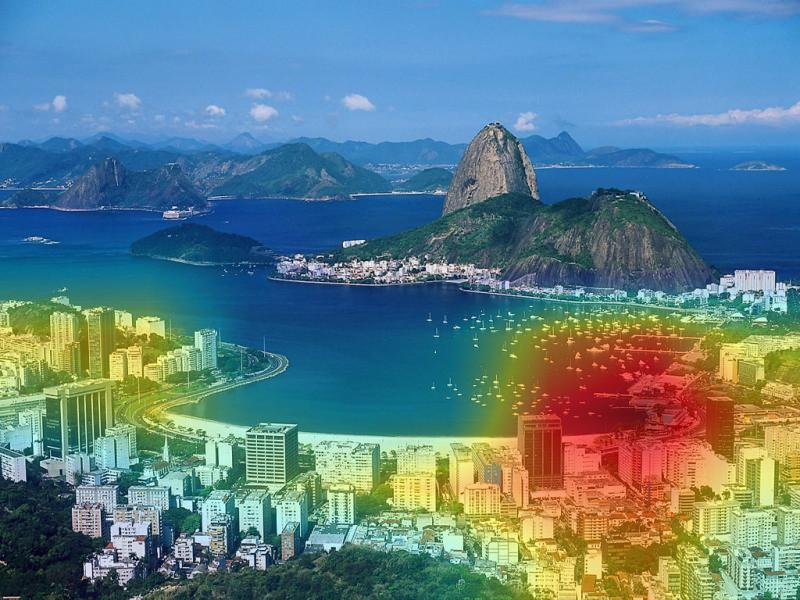

In [ ]:
#I wasn't sure for 2c if we were supposed to show feature maps 
#For all 5 units, but I did so below
for unit in index:
  print("Showing Feature Map of Unit {}".format(unit))
  feat = generate_featuremap_unit(model_cut, unit, img_pil)
  im_final = visualize_featuremap(img_numpy, feat)
  showarray(im_final)


# Problem 3: Visualizing model activations with Class Activation Maps (CAMs)


Once we have load the image and the model, now we will explore how to visualize the internal activations of the model. We will start by visualizing which parts of the image are responsibe for the final decision.

![texto alternativo](https://camo.githubusercontent.com/fb9a2d0813e5d530f49fa074c378cf83959346f7/687474703a2f2f636e6e6c6f63616c697a6174696f6e2e637361696c2e6d69742e6564752f6672616d65776f726b2e6a7067)


We create a version of the model without the last two layers, so that we can access the last convolutional layer.


We compute the activations using the Class Activation Mapping for a given output label.


Visualizing category village
torch.Size([64, 2048])
torch.Size([64, 365])


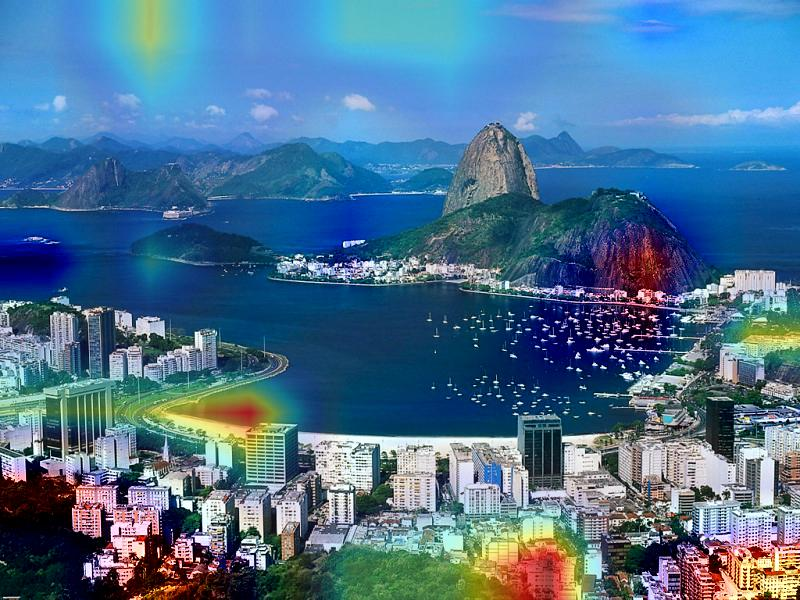

Visualizing category islet
torch.Size([64, 2048])
torch.Size([64, 365])


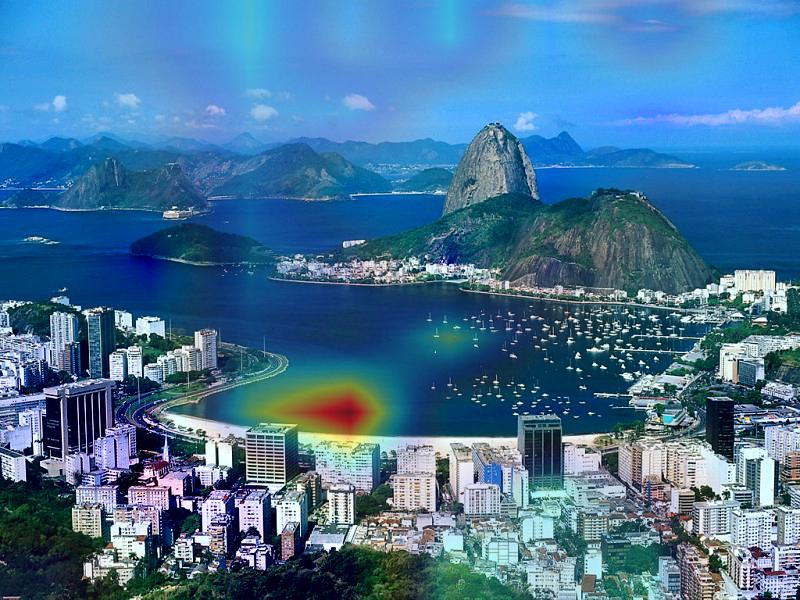

Visualizing category beach_house
torch.Size([64, 2048])
torch.Size([64, 365])


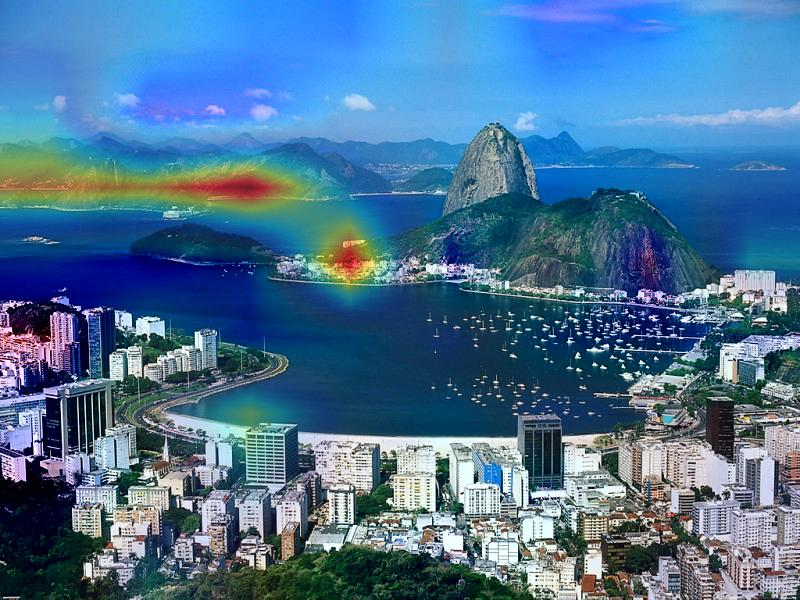

Visualizing category coast
torch.Size([64, 2048])
torch.Size([64, 365])


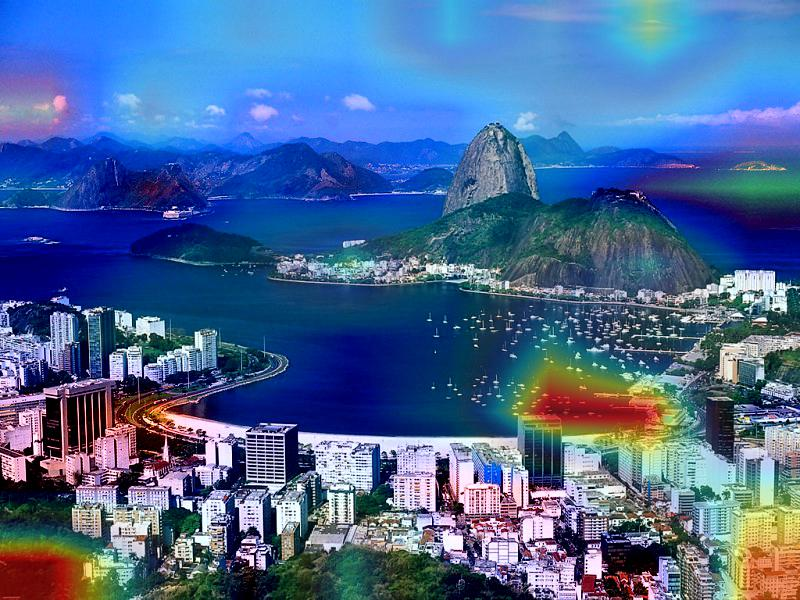

Visualizing category harbor
torch.Size([64, 2048])
torch.Size([64, 365])


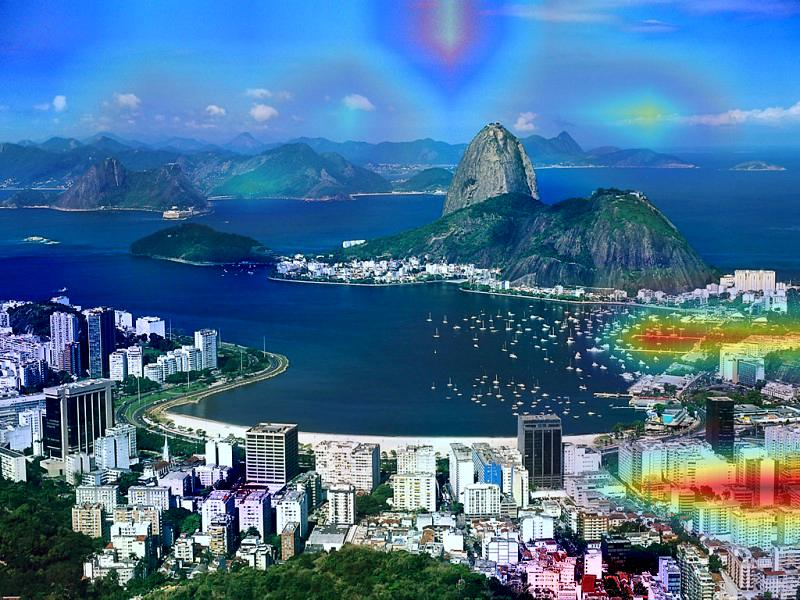

In [ ]:
def generate_featuremap_CAM(model, unit_id, im_input):
    # Extract activation from model
    model.eval()
    im = center_crop(im_input)
    activations = model(im.unsqueeze(0)).squeeze()  # 2048 x h x w
    num_channels, height, width = activations.shape

    # TODO (3a): convert the shape of the output (activations variable) to (h*w) x c
    # Purpose of this question: reshaping (.view) tensors can be tricky. The default
    # ordering of dimensions is usually channel first. You may need to .transpose()
    # to correct for this. This is one of the most common sources of bugs in
    # deep NN implementations
    activations = activations.view(num_channels, -1).transpose(0, 1)
    print(activations.shape)

    # TODO (3b): Run the fully connected layer from resnet to compute the weighted average with activations as the input variable
    # out_final should be a (h*w) x 365 tensor.

    #Get last 2 layers
    list_of_children = list(resnet.children())
    second_to_last_layer = torch.nn.Sequential(list_of_children[-2])
    last_layer = torch.nn.Sequential(list_of_children[-1])

    #Run through layer
    out_final = last_layer(activations)
    print(out_final.shape) # 64 x 365

    # TODO (3c): obtain the class activation map for the corresponding unit_id
    # class_activation_maps should be a 365 x height x width tensor.
    #I'm not sure if I did this part right, I tried to use .transpose but 
    #Got even worse results (commented out)
    class_activation_maps =  out_final.view(365, height, width)
    #class_activation_maps = out_final = out_final.transpose(0, 1)

    return class_activation_maps[unit_id]

# Visualize the most activated region in the image for the 5 top classes
for i in range(categories.shape[0]):
    print('Visualizing category', classlabels[categories[i]])
    feat = generate_featuremap_CAM(model_cut, categories[i].item(), img_pil)
    im_result = visualize_featuremap(img_numpy, feat)
    showarray(im_result)

    #Comments on the relationship between the feature activations and the catagories:
    #In general, I'm not sure I did this part right, so if there are abnormailities
    #Due to bugs in my code, then that would explain some difficulty in answering this

    # Village
    # Broad activation across many features, possibly reasonable as village might 
    # consist of water, buildings, mountains, etc., which is reflected in the activated features
    # Islet
    # An islet is a very small island, and features around some of the boats are shown
    # Which might be misinterpreted as islets. There is a large unexplained 
    # activation in the middle of the bay, however
    # Beach House
    # Should reflect homes on the beach, which this roughly does
    # Coast 
    # Should reflect the coastline; which the feature activation map shows some of
    # But there are unexplained activations in the bootom corners of the image
    # Harbor
    # The feature activation map shows activity around some of the boats,
    # But also anomalously around some of the buildings around the lower right
    # This might be similar in optical sturcture to the boat-in-ocean pattern,
    # Or could be an error due to coding issues 



# Problem 4: Training your own classifier

The goal of this problem is to train a small convolutional neural network to classify images of clothing items from the FashionMNIST dataset. You'll first fill in critical components of a simple PyTorch training pipeline, evaluate the model on the test set, and explore the impact of specific design choices and hyperparameters on the model's performance.

## Building an FashionMNIST Classifier

Using what we have learned, let's build a simple FasionMNIST classifier. Each element of the dataset is a 2-tuple: the 28x28 image and its label.


The [`torchvision`](https://pytorch.org/docs/stable/torchvision/index.html) library provides a wide range of standard vision datasets and networks with pretrained weights. We will use [the `torchvision.datasets.FashionMNIST` class](https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST) to easily access the FasionMNIST dataset.

In deep learning, it is often a good idea to normalize network inputs to be centered around zero. We use the [`torchvision.transforms.Normalize`](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.Normalize) tranform to achieve this. We compose the transforms together using the [`torchvision.transforms.Compose`](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.Compose) transform, which allows us to apply multiple transforms sequentially. We provide the following functions to help create the FashionMNIST dataset with these transforms:

In [ ]:
def get_transform(split='train'):
    return transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize((0.5,), (0.5,)),
        ]
    )

def get_dataset(split='train', transform=None):
    return datasets.FashionMNIST(
        'data',
        train=split == 'train',
        download=True,
        transform=transform if transform is not None else transforms.ToTensor(),
    )

def get_dataloaders(batch_size=64, num_workers=2):
    '''Use Pytorch torch.utils.data.DataLoader to load batched data'''
    train_dataset = get_dataset('train', get_transform())
    val_dataset = get_dataset('val', get_transform())
    train_dataloader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,  # shuffle training set
        num_workers=num_workers,  # turns on multi-processing loading so training is not blocked by data loading
        pin_memory=True,  # pin_memory allows faster transfer from CPU to GPU
    )
    val_dataloader = torch.utils.data.DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        pin_memory=True,
    )
    return train_dataloader, val_dataloader

print('training set size:\t{}'.format(len(get_dataset('train'))))
print('validation set size:\t{}'.format(len(get_dataset('val'))))

# Each element yielded by `train_loader` (a Python iterable) is still a 2-tuple,
# but now consisting of a batched image tensor, and a batched label tensor.
train_loader, _ = get_dataloaders()
images, labels = next(iter(train_loader))

print('batched image tensor shape: {}'.format(images.shape))
print('batched label tensor shape: {}'.format(labels.shape))

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw

training set size:	60000
validation set size:	10000
batched image tensor shape: torch.Size([64, 1, 28, 28])
batched label tensor shape: torch.Size([64])


### Building the Network

We will use a convolutional network for classification. The following architecture is adapted from the famous [LeNet-5](https://ieeexplore.ieee.org/document/726791) [1].

[1] LeCun, Yann, et al. "Gradient-based learning applied to document recognition." Proceedings of the IEEE 86.11 (1998): 2278-2324.


In [ ]:
class MyNet(nn.Module):
    def __init__(
        self,
        num_classes=10,
        kernel_size=5,
        filter1_size=5,
        filter2_size=16,
        fc1_size=120,
        fc2_size=84,
    ):
        super().__init__()
        self.conv1 = nn.Conv2d(
            in_channels=1,
            out_channels=filter1_size,
            kernel_size=kernel_size,
            padding=2,
        )
        self.conv2 = nn.Conv2d(
            in_channels=filter1_size,
            out_channels=filter2_size,
            kernel_size=kernel_size,
        )
        self.fc1 = nn.Linear(in_features=filter2_size * kernel_size ** 2, out_features=fc1_size)
        self.fc2 = nn.Linear(in_features=fc1_size, out_features=fc2_size)
        self.fc3 = nn.Linear(in_features=fc2_size, out_features=num_classes)

    def forward(self, x):
        out = F.relu(self.conv1(x))
        out = F.max_pool2d(out, 2)
        out = F.relu(self.conv2(out))
        out = F.max_pool2d(out, 2)
        out = out.view(out.size(0), -1)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return out

net = MyNet().to(device)
  
# This network output a size 10 vector for each input image, as verified below
# using a random input tensor.
net(torch.randn(32, 1, 28, 28, device=device)).shape


torch.Size([32, 10])

### **Problem 4a: Training Loop**

For classification, we will use the cross-entropy loss [`F.cross_entropy`](https://pytorch.org/docs/stable/generated/torch.nn.functional.cross_entropy.html?highlight=cross_entropy#torch.nn.functional.cross_entropy) to train this network.

We write a function that accepts a PyTorch dataloader, model and optimizer (as well as a device and current epoch), and trains the net for 1 epoch (one full pass through the training set).

The next exercise is to fill in the code below. You can use the following pytorch functions:

-   put data on GPU: [to](https://pytorch.org/docs/stable/generated/torch.Tensor.to.html?highlight=#torch.to)
-   clear gradient: [zero_grad](https://pytorch.org/docs/stable/generated/torch.optim.Optimizer.zero_grad.html?highlight=zero_grad)
-   backward pass: [backward](https://pytorch.org/docs/stable/generated/torch.autograd.backward.html?highlight=backward#torch.autograd.backward)
-   update parameters with a gradient step: [step](https://pytorch.org/docs/stable/generated/torch.optim.Optimizer.step.html?highlight=step#torch.optim.Optimizer.step)


In [ ]:
########################
#                      #
#       Exercise       #
#                      #
########################

# Fix the places with a TODO

def accuracy(output, target):
    """Computes the accuracy of the model on the test set.

    Args:
        output: the output of the model
        target: the ground truth labels
    Returns:
        the accuracy of the model on the test set
    """
    with torch.no_grad():
        _, predicted = torch.max(output, 1)
        correct = (predicted == target).sum().item()
    return correct / len(target)


class AverageMeter(object):
    """Computes and stores the average and current value"""

    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count


def train(dataloader, model, optimizer, epoch):
    model.train()
    #model.to(device)

    train_loss = []
    acc_meter = AverageMeter()
    batches = tqdm(enumerate(dataloader), total=len(dataloader))
    batches.set_description("Epoch NA: Loss (NA) Accuracy (NA %)")
    for batch_idx, (data, target) in batches:

        # TODO: Move data to appropriate device
        data = data.to(device)
        target = target.to(device)

        # TODO: Zero out gradients
        optimizer.zero_grad()

        # TODO: Compute forward pass, loss, and gradients
        #Compute forward pass:
        output = model(data)
        #Compute loss:
        loss = F.cross_entropy(output, target)

        #Compute gradients:
        loss.backward()

        # TODO: Update parameters
        optimizer.step()

        # TODO: Compute and record accuracy
        acc = accuracy(output, target)

        acc_meter.update(acc)

        batches.set_description(
            "Epoch {:d}: Loss ({:.2e}), Train Accuracy ({:02.0f}%)".format(
                epoch, loss.item(), 100.0 * acc_meter.avg
            )
        )

    return train_loss, acc_meter.avg


## Problem 4b: Evaluating the Model

Let's also write a function that evaluates our network on the validation set.


In [ ]:
########################
#                      #
#       Exercise       #
#                      #
########################

# Fix the places with a TODO


def get_prediction(image, net):
    # TODO!!!  (HINT: use .argmax(dim=-1))
    #   `prediction` should be an integer vector of size equal to the batch size.
    #   Remember that the network outputs logits of the prediction probabilities,
    #   and that the higher the logits, the higher the probability.
    prediction = net(image).argmax(dim=-1)
    return prediction

def evaluate(dataloader, net):
    total = 0
    correct = 0

    net.eval()  # puts the network in eval mode. this is important when the
    # network has layers that behaves differently in training and
    # evaluation time, e.g., dropout and batch norm.
    for image, label in dataloader:
        image, label = image.to(device), label.to(device)

        with torch.no_grad():  # gradients are not tracked in this context manager
            # since we are evaluating, gradients are not needed
            # and we can save some time and GPU memory.

            # TODO: Get predictions using function from above
            prediction = get_prediction(image, net)

            # TODO: Update total and correct
            total += label.size(0)
            correct += (prediction == label).sum().item()


    return correct / total

In [ ]:
# Without any training, the network accuracy matches that of random guessing: ~10%.
_, val_loader = get_dataloaders(batch_size=32, num_workers=0)
print('At initialization, the network has accuracy {:.4f}%'.format(evaluate(val_loader, net) * 100))


At initialization, the network has accuracy 9.7200%


## Problem 4c: Putting Everything Together


In [ ]:
########################
#                      #
#    Exercise 4c       #
#                      #
########################


# Fix the places with a TODO
num_epochs = 10
lr = 0.01

def create_optimizer(net, lr):
    # TODO: Create optimizer
    optimizer = torch.optim.Adam(net.parameters(), lr=lr)
    #optimizer = optimizer.to(device)

    return optimizer

optim = create_optimizer(net, lr)
train_loader, val_loader = get_dataloaders(batch_size=128)

for epoch in range(num_epochs):
    print('Epoch: {}\tValidation Accuracy: {:.4f}%'.format(epoch, evaluate(val_loader, net) * 100))
    train(train_loader, net, optim, epoch)

valid_accuracy = evaluate(val_loader, net) * 100
print('Done! \tValidation Accuracy: {:.4f}%'.format(valid_accuracy))


Epoch: 0	Validation Accuracy: 9.7200%


Epoch 0: Loss (4.72e-01), Train Accuracy (81%): 100%|██████████| 469/469 [00:15<00:00, 30.11it/s]


Epoch: 1	Validation Accuracy: 85.7300%


Epoch 1: Loss (2.67e-01), Train Accuracy (87%): 100%|██████████| 469/469 [00:15<00:00, 29.94it/s]


Epoch: 2	Validation Accuracy: 87.0600%


Epoch 2: Loss (2.06e-01), Train Accuracy (88%): 100%|██████████| 469/469 [00:15<00:00, 29.84it/s]


Epoch: 3	Validation Accuracy: 87.6600%


Epoch 3: Loss (2.94e-01), Train Accuracy (89%): 100%|██████████| 469/469 [00:16<00:00, 28.26it/s]


Epoch: 4	Validation Accuracy: 87.4500%


Epoch 4: Loss (2.25e-01), Train Accuracy (89%): 100%|██████████| 469/469 [00:15<00:00, 30.78it/s]


Epoch: 5	Validation Accuracy: 87.5000%


Epoch 5: Loss (3.08e-01), Train Accuracy (89%): 100%|██████████| 469/469 [00:18<00:00, 25.24it/s]


Epoch: 6	Validation Accuracy: 88.6900%


Epoch 6: Loss (2.29e-01), Train Accuracy (90%): 100%|██████████| 469/469 [00:15<00:00, 30.46it/s]


Epoch: 7	Validation Accuracy: 88.0500%


Epoch 7: Loss (2.49e-01), Train Accuracy (90%): 100%|██████████| 469/469 [00:15<00:00, 30.67it/s]


Epoch: 8	Validation Accuracy: 88.5100%


Epoch 8: Loss (3.68e-01), Train Accuracy (90%): 100%|██████████| 469/469 [00:15<00:00, 30.16it/s]


Epoch: 9	Validation Accuracy: 87.6800%


Epoch 9: Loss (1.68e-01), Train Accuracy (90%): 100%|██████████| 469/469 [00:16<00:00, 29.29it/s]


Done! 	Validation Accuracy: 88.4900%


In [ ]:
#Observed a final validation accuracy of 88.4900%

## Problem 4d (required for 6.8300 only)



We want you to get a feel for the impact of specific design choices on the performance of the network. Experiment with two or more of the following hyperparameters / techniques:

-   Data augmentation
-   Weight initialization
-   Number of layers, or number of layer features
-   Type of optimizer
-   Learning rate and/or schedule
-   Regularization

For the techniques you choose, plot the top-1 accuracy of your modified network against the top-1 accuracy of the original network for both the training and validation sets. Try several different hyperparameter values! For example, if you choose to modify the learning rate, you can plot a chart of learning rate vs. top-1 accuracy. Briefly describe the techniques you tried, and suggest an explanation for your results. **Full credit will only be given if at least 90% validation accuracy is achieved (i.e., the accuracy must be above 89.9999999%).**

In [ ]:
########################
#                      #
#    Exercise 4d       #
#                      #
########################

## Run at different learning rates and different optimizers


def create_custom_optimizer(net, lr,opti_name=0):
    if optimizer_type == 0:
      print("using ADAM")
      optimizer = torch.optim.Adam(net.parameters(), lr=lr)

    if optimizer_type == 1:
      optimizer = torch.optim.Adagrad(net.parameters(), lr=lr)
      print("using ADAGRAD")

    if optimizer_type == 2:
      optimizer = torch.optim.Adadelta(net.parameters(), rho=0.9, eps=1e-06)
      print("using ADADELTA")

    return optimizer

# Initialize variables to track accuracies
train_accuracies = [{},{},{}]
val_accuracies = [{},{},{}]

for optimizer_type in [0,1]:
  for lr in [0.02,0.01,0.005,0.002,0.001]: #0.002 worked well to get 90%>
    num_epochs = 20
    #Reinitalize 
    net = MyNet().to(device)
    net(torch.randn(32, 1, 28, 28, device=device)).shape
    #Validate initalization at ~10% level
    _, val_loader = get_dataloaders(batch_size=32, num_workers=0)
    print('At initialization, the network has accuracy {:.4f}%'.format(evaluate(val_loader, net) * 100))

    optim = create_custom_optimizer(net, lr,opti_name=0)
    train_loader, val_loader = get_dataloaders(batch_size=128)

    train_accuracies[optimizer_type][lr] = []
    val_accuracies[optimizer_type][lr] = []

    for epoch in range(num_epochs):
          train_acc = evaluate(train_loader, net) * 100
          val_acc = evaluate(val_loader, net) * 100

          train_accuracies[optimizer_type][lr].append(train_acc)
          val_accuracies[optimizer_type][lr].append(val_acc)

          print('Epoch: {}\tTraining Accuracy: {:.4f}%\tValidation Accuracy: {:.4f}%'.format(epoch, train_acc, val_acc))
          train(train_loader, net, optim, epoch)

    valid_accuracy = evaluate(val_loader, net) * 100
    print('Done! \tValidation Accuracy: {:.4f}%'.format(valid_accuracy))




At initialization, the network has accuracy 9.9200%
using ADAM
Epoch: 0	Training Accuracy: 9.8933%	Validation Accuracy: 9.9200%


Epoch 0: Loss (6.36e-01), Train Accuracy (76%): 100%|██████████| 469/469 [00:15<00:00, 30.76it/s]


Epoch: 1	Training Accuracy: 80.3300%	Validation Accuracy: 79.3700%


Epoch 1: Loss (3.92e-01), Train Accuracy (82%): 100%|██████████| 469/469 [00:16<00:00, 28.71it/s]


Epoch: 2	Training Accuracy: 84.1667%	Validation Accuracy: 83.1900%


Epoch 2: Loss (5.89e-01), Train Accuracy (83%): 100%|██████████| 469/469 [00:16<00:00, 28.55it/s]


Epoch: 3	Training Accuracy: 83.4583%	Validation Accuracy: 82.3700%


Epoch 3: Loss (6.45e-01), Train Accuracy (81%): 100%|██████████| 469/469 [00:15<00:00, 30.63it/s]


Epoch: 4	Training Accuracy: 83.1767%	Validation Accuracy: 82.0100%


Epoch 4: Loss (5.57e-01), Train Accuracy (84%): 100%|██████████| 469/469 [00:15<00:00, 29.89it/s]


Epoch: 5	Training Accuracy: 84.2450%	Validation Accuracy: 82.8900%


Epoch 5: Loss (3.35e-01), Train Accuracy (84%): 100%|██████████| 469/469 [00:15<00:00, 30.25it/s]


Epoch: 6	Training Accuracy: 84.8083%	Validation Accuracy: 83.4600%


Epoch 6: Loss (3.78e-01), Train Accuracy (84%): 100%|██████████| 469/469 [00:16<00:00, 28.36it/s]


Epoch: 7	Training Accuracy: 83.9917%	Validation Accuracy: 82.8900%


Epoch 7: Loss (4.24e-01), Train Accuracy (85%): 100%|██████████| 469/469 [00:15<00:00, 30.46it/s]


Epoch: 8	Training Accuracy: 83.3150%	Validation Accuracy: 81.6100%


Epoch 8: Loss (4.40e-01), Train Accuracy (84%): 100%|██████████| 469/469 [00:15<00:00, 29.94it/s]


Epoch: 9	Training Accuracy: 85.0050%	Validation Accuracy: 83.1500%


Epoch 9: Loss (4.13e-01), Train Accuracy (85%): 100%|██████████| 469/469 [00:15<00:00, 30.14it/s]


Epoch: 10	Training Accuracy: 84.5317%	Validation Accuracy: 82.7300%


Epoch 10: Loss (4.22e-01), Train Accuracy (85%): 100%|██████████| 469/469 [00:16<00:00, 29.17it/s]


Epoch: 11	Training Accuracy: 85.4683%	Validation Accuracy: 84.0400%


Epoch 11: Loss (5.38e-01), Train Accuracy (85%): 100%|██████████| 469/469 [00:15<00:00, 29.93it/s]


Epoch: 12	Training Accuracy: 84.7183%	Validation Accuracy: 83.6700%


Epoch 12: Loss (5.21e-01), Train Accuracy (85%): 100%|██████████| 469/469 [00:15<00:00, 29.91it/s]


Epoch: 13	Training Accuracy: 84.6683%	Validation Accuracy: 83.3900%


Epoch 13: Loss (3.86e-01), Train Accuracy (85%): 100%|██████████| 469/469 [00:15<00:00, 30.18it/s]


Epoch: 14	Training Accuracy: 85.0233%	Validation Accuracy: 84.0300%


Epoch 14: Loss (3.96e-01), Train Accuracy (85%): 100%|██████████| 469/469 [00:16<00:00, 28.43it/s]


Epoch: 15	Training Accuracy: 84.7817%	Validation Accuracy: 83.5500%


Epoch 15: Loss (3.90e-01), Train Accuracy (85%): 100%|██████████| 469/469 [00:15<00:00, 30.52it/s]


Epoch: 16	Training Accuracy: 85.2967%	Validation Accuracy: 84.1000%


Epoch 16: Loss (4.32e-01), Train Accuracy (85%): 100%|██████████| 469/469 [00:15<00:00, 29.85it/s]


Epoch: 17	Training Accuracy: 85.3683%	Validation Accuracy: 84.1300%


Epoch 17: Loss (3.50e-01), Train Accuracy (85%): 100%|██████████| 469/469 [00:15<00:00, 30.00it/s]


Epoch: 18	Training Accuracy: 85.2400%	Validation Accuracy: 84.7500%


Epoch 18: Loss (5.15e-01), Train Accuracy (85%): 100%|██████████| 469/469 [00:15<00:00, 29.33it/s]


Epoch: 19	Training Accuracy: 86.4117%	Validation Accuracy: 84.9500%


Epoch 19: Loss (3.75e-01), Train Accuracy (85%): 100%|██████████| 469/469 [00:15<00:00, 30.01it/s]


Done! 	Validation Accuracy: 84.2900%
At initialization, the network has accuracy 9.5100%
using ADAM
Epoch: 0	Training Accuracy: 9.6500%	Validation Accuracy: 9.5100%


Epoch 0: Loss (3.04e-01), Train Accuracy (81%): 100%|██████████| 469/469 [00:16<00:00, 29.00it/s]


Epoch: 1	Training Accuracy: 87.3800%	Validation Accuracy: 86.3500%


Epoch 1: Loss (2.69e-01), Train Accuracy (87%): 100%|██████████| 469/469 [00:15<00:00, 29.89it/s]


Epoch: 2	Training Accuracy: 88.9133%	Validation Accuracy: 87.4000%


Epoch 2: Loss (3.90e-01), Train Accuracy (88%): 100%|██████████| 469/469 [00:15<00:00, 30.30it/s]


Epoch: 3	Training Accuracy: 89.3967%	Validation Accuracy: 87.6600%


Epoch 3: Loss (2.72e-01), Train Accuracy (89%): 100%|██████████| 469/469 [00:15<00:00, 30.89it/s]


Epoch: 4	Training Accuracy: 90.0000%	Validation Accuracy: 88.5300%


Epoch 4: Loss (2.52e-01), Train Accuracy (89%): 100%|██████████| 469/469 [00:15<00:00, 29.69it/s]


Epoch: 5	Training Accuracy: 89.2933%	Validation Accuracy: 87.6600%


Epoch 5: Loss (2.03e-01), Train Accuracy (90%): 100%|██████████| 469/469 [00:15<00:00, 30.57it/s]


Epoch: 6	Training Accuracy: 90.2617%	Validation Accuracy: 87.9100%


Epoch 6: Loss (2.25e-01), Train Accuracy (90%): 100%|██████████| 469/469 [00:15<00:00, 30.57it/s]


Epoch: 7	Training Accuracy: 90.5367%	Validation Accuracy: 88.4600%


Epoch 7: Loss (2.34e-01), Train Accuracy (90%): 100%|██████████| 469/469 [00:15<00:00, 30.10it/s]


Epoch: 8	Training Accuracy: 89.1333%	Validation Accuracy: 86.6800%


Epoch 8: Loss (3.82e-01), Train Accuracy (90%): 100%|██████████| 469/469 [00:15<00:00, 30.79it/s]


Epoch: 9	Training Accuracy: 90.6533%	Validation Accuracy: 88.3000%


Epoch 9: Loss (1.94e-01), Train Accuracy (90%): 100%|██████████| 469/469 [00:16<00:00, 29.04it/s]


Epoch: 10	Training Accuracy: 88.6850%	Validation Accuracy: 85.8700%


Epoch 10: Loss (2.08e-01), Train Accuracy (91%): 100%|██████████| 469/469 [00:15<00:00, 30.66it/s]


Epoch: 11	Training Accuracy: 90.9917%	Validation Accuracy: 88.5000%


Epoch 11: Loss (4.59e-01), Train Accuracy (91%): 100%|██████████| 469/469 [00:15<00:00, 30.89it/s]


Epoch: 12	Training Accuracy: 91.2633%	Validation Accuracy: 88.4100%


Epoch 12: Loss (2.95e-01), Train Accuracy (91%): 100%|██████████| 469/469 [00:15<00:00, 30.22it/s]


Epoch: 13	Training Accuracy: 90.6783%	Validation Accuracy: 88.0000%


Epoch 13: Loss (3.20e-01), Train Accuracy (91%): 100%|██████████| 469/469 [00:16<00:00, 29.17it/s]


Epoch: 14	Training Accuracy: 91.3233%	Validation Accuracy: 88.6700%


Epoch 14: Loss (2.35e-01), Train Accuracy (91%): 100%|██████████| 469/469 [00:15<00:00, 30.60it/s]


Epoch: 15	Training Accuracy: 91.8200%	Validation Accuracy: 88.6900%


Epoch 15: Loss (2.47e-01), Train Accuracy (91%): 100%|██████████| 469/469 [00:15<00:00, 30.88it/s]


Epoch: 16	Training Accuracy: 91.7000%	Validation Accuracy: 88.3600%


Epoch 16: Loss (2.09e-01), Train Accuracy (91%): 100%|██████████| 469/469 [00:15<00:00, 31.08it/s]


Epoch: 17	Training Accuracy: 91.3367%	Validation Accuracy: 88.5500%


Epoch 17: Loss (2.09e-01), Train Accuracy (91%): 100%|██████████| 469/469 [00:15<00:00, 31.12it/s]


Epoch: 18	Training Accuracy: 92.1150%	Validation Accuracy: 89.0300%


Epoch 18: Loss (3.78e-01), Train Accuracy (91%): 100%|██████████| 469/469 [00:15<00:00, 30.10it/s]


Epoch: 19	Training Accuracy: 89.2100%	Validation Accuracy: 86.5000%


Epoch 19: Loss (1.74e-01), Train Accuracy (91%): 100%|██████████| 469/469 [00:15<00:00, 31.19it/s]


Done! 	Validation Accuracy: 89.2100%
At initialization, the network has accuracy 9.9100%
using ADAM
Epoch: 0	Training Accuracy: 9.9667%	Validation Accuracy: 9.9100%


Epoch 0: Loss (4.09e-01), Train Accuracy (81%): 100%|██████████| 469/469 [00:15<00:00, 30.53it/s]


Epoch: 1	Training Accuracy: 87.7417%	Validation Accuracy: 86.2400%


Epoch 1: Loss (3.52e-01), Train Accuracy (88%): 100%|██████████| 469/469 [00:15<00:00, 30.58it/s]


Epoch: 2	Training Accuracy: 88.3983%	Validation Accuracy: 87.0300%


Epoch 2: Loss (2.55e-01), Train Accuracy (89%): 100%|██████████| 469/469 [00:15<00:00, 30.75it/s]


Epoch: 3	Training Accuracy: 89.9150%	Validation Accuracy: 88.3000%


Epoch 3: Loss (3.05e-01), Train Accuracy (90%): 100%|██████████| 469/469 [00:15<00:00, 30.64it/s]


Epoch: 4	Training Accuracy: 89.7867%	Validation Accuracy: 87.6600%


Epoch 4: Loss (3.09e-01), Train Accuracy (90%): 100%|██████████| 469/469 [00:15<00:00, 30.68it/s]


Epoch: 5	Training Accuracy: 91.4600%	Validation Accuracy: 89.3700%


Epoch 5: Loss (2.03e-01), Train Accuracy (91%): 100%|██████████| 469/469 [00:15<00:00, 29.81it/s]


Epoch: 6	Training Accuracy: 91.6517%	Validation Accuracy: 89.3500%


Epoch 6: Loss (2.22e-01), Train Accuracy (91%): 100%|██████████| 469/469 [00:15<00:00, 29.70it/s]


Epoch: 7	Training Accuracy: 92.3917%	Validation Accuracy: 89.6300%


Epoch 7: Loss (3.46e-01), Train Accuracy (92%): 100%|██████████| 469/469 [00:15<00:00, 30.55it/s]


Epoch: 8	Training Accuracy: 92.9133%	Validation Accuracy: 89.5200%


Epoch 8: Loss (2.99e-01), Train Accuracy (92%): 100%|██████████| 469/469 [00:15<00:00, 30.01it/s]


Epoch: 9	Training Accuracy: 92.3967%	Validation Accuracy: 89.1700%


Epoch 9: Loss (1.81e-01), Train Accuracy (92%): 100%|██████████| 469/469 [00:15<00:00, 30.77it/s]


Epoch: 10	Training Accuracy: 92.4717%	Validation Accuracy: 88.8600%


Epoch 10: Loss (2.78e-01), Train Accuracy (93%): 100%|██████████| 469/469 [00:15<00:00, 29.97it/s]


Epoch: 11	Training Accuracy: 93.3733%	Validation Accuracy: 89.6900%


Epoch 11: Loss (1.52e-01), Train Accuracy (93%): 100%|██████████| 469/469 [00:15<00:00, 30.27it/s]


Epoch: 12	Training Accuracy: 93.3783%	Validation Accuracy: 89.3100%


Epoch 12: Loss (1.63e-01), Train Accuracy (93%): 100%|██████████| 469/469 [00:15<00:00, 30.37it/s]


Epoch: 13	Training Accuracy: 93.9083%	Validation Accuracy: 89.5000%


Epoch 13: Loss (1.95e-01), Train Accuracy (93%): 100%|██████████| 469/469 [00:15<00:00, 29.41it/s]


Epoch: 14	Training Accuracy: 93.7833%	Validation Accuracy: 89.5000%


Epoch 14: Loss (1.54e-01), Train Accuracy (94%): 100%|██████████| 469/469 [00:16<00:00, 28.87it/s]


Epoch: 15	Training Accuracy: 94.1233%	Validation Accuracy: 89.5800%


Epoch 15: Loss (1.67e-01), Train Accuracy (94%): 100%|██████████| 469/469 [00:16<00:00, 28.69it/s]


Epoch: 16	Training Accuracy: 94.3033%	Validation Accuracy: 89.5000%


Epoch 16: Loss (2.53e-01), Train Accuracy (94%): 100%|██████████| 469/469 [00:15<00:00, 30.22it/s]


Epoch: 17	Training Accuracy: 94.5317%	Validation Accuracy: 89.2300%


Epoch 17: Loss (2.02e-01), Train Accuracy (94%): 100%|██████████| 469/469 [00:15<00:00, 29.71it/s]


Epoch: 18	Training Accuracy: 94.6033%	Validation Accuracy: 89.4000%


Epoch 18: Loss (1.88e-01), Train Accuracy (94%): 100%|██████████| 469/469 [00:16<00:00, 28.54it/s]


Epoch: 19	Training Accuracy: 95.0750%	Validation Accuracy: 89.4800%


Epoch 19: Loss (3.06e-01), Train Accuracy (94%): 100%|██████████| 469/469 [00:16<00:00, 27.98it/s]


Done! 	Validation Accuracy: 89.2500%
At initialization, the network has accuracy 9.8100%
using ADAM
Epoch: 0	Training Accuracy: 9.7567%	Validation Accuracy: 9.8100%


Epoch 0: Loss (4.28e-01), Train Accuracy (78%): 100%|██████████| 469/469 [00:16<00:00, 29.28it/s]
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/util

Epoch: 1	Training Accuracy: 85.6617%	Validation Accuracy: 84.5300%


Epoch 1: Loss (3.94e-01), Train Accuracy (87%):  95%|█████████▌| 446/469 [00:15<00:01, 20.43it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils

Epoch: 2	Training Accuracy: 87.2550%	Validation Accuracy: 86.0800%


Epoch 2: Loss (2.86e-01), Train Accuracy (89%):  95%|█████████▌| 447/469 [00:15<00:00, 33.62it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils

Epoch: 3	Training Accuracy: 89.4400%	Validation Accuracy: 87.9400%


Epoch 3: Loss (3.23e-01), Train Accuracy (90%):  95%|█████████▍| 445/469 [00:14<00:00, 32.20it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils

Epoch: 4	Training Accuracy: 90.2967%	Validation Accuracy: 88.6700%


Epoch 4: Loss (2.70e-01), Train Accuracy (90%):  94%|█████████▍| 440/469 [00:15<00:01, 20.76it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils

Epoch: 5	Training Accuracy: 91.4733%	Validation Accuracy: 89.3200%


Epoch 5: Loss (3.38e-01), Train Accuracy (91%):  88%|████████▊ | 415/469 [00:14<00:01, 31.63it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils

Epoch: 6	Training Accuracy: 91.7767%	Validation Accuracy: 89.3900%


Epoch 6: Loss (1.44e-01), Train Accuracy (91%):  83%|████████▎ | 389/469 [00:13<00:02, 32.90it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():Exception ignored in: 
<function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive

    Traceback (most recent call last):
assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError:   File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    can only test a child processself._shutdown_workers()

  File "/usr/local/lib/python3.9/dist-packages/torch/utils

Epoch: 7	Training Accuracy: 92.5017%	Validation Accuracy: 89.9600%


Epoch 7: Loss (1.58e-01), Train Accuracy (92%):  83%|████████▎ | 390/469 [00:13<00:03, 21.47it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
assert self._parent_pid == os.getpid(), 'can only test a child p

Epoch: 8	Training Accuracy: 91.4650%	Validation Accuracy: 88.8400%


Epoch 8: Loss (1.61e-01), Train Accuracy (92%):  77%|███████▋  | 362/469 [00:12<00:03, 31.90it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils

Epoch: 9	Training Accuracy: 93.0850%	Validation Accuracy: 89.6800%


Epoch 9: Loss (2.02e-01), Train Accuracy (93%):  77%|███████▋  | 359/469 [00:12<00:03, 32.25it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>Exception ignored in: 
<function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
        self._shutdown_workers()
self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
        if w.is_alive():if w.is_alive():

  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'ca

Epoch: 10	Training Accuracy: 93.1150%	Validation Accuracy: 89.6000%


Epoch 10: Loss (1.51e-01), Train Accuracy (93%):  77%|███████▋  | 360/469 [00:12<00:04, 23.62it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0><function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>

Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data

Epoch: 11	Training Accuracy: 93.5167%	Validation Accuracy: 89.7800%


Epoch 11: Loss (1.75e-01), Train Accuracy (93%):  66%|██████▌   | 309/469 [00:11<00:05, 27.60it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/util

Epoch: 12	Training Accuracy: 93.8900%	Validation Accuracy: 89.8300%


Epoch 12: Loss (1.68e-01), Train Accuracy (94%):  65%|██████▌   | 306/469 [00:09<00:05, 32.57it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    
self._shutdown_workers()  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: Exception ignored in: can only test a child process
<function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Traceback (most recent call last):
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del

Epoch: 13	Training Accuracy: 94.1983%	Validation Accuracy: 89.9600%


Epoch 13: Loss (1.47e-01), Train Accuracy (94%):  65%|██████▌   | 306/469 [00:11<00:06, 26.43it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
Exception ignored in: AssertionError<function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
: can only test a child process
Traceback (most recent call last):
Exception ignored in:   File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
<function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9

Epoch: 14	Training Accuracy: 94.9417%	Validation Accuracy: 90.2100%


Epoch 14: Loss (1.16e-01), Train Accuracy (94%):  55%|█████▍    | 256/469 [00:09<00:06, 31.02it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
Exception ignored in:     
<function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>self._shutdown_workers()
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
        self._shutdown_workers()if w.is_alive():

  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child 

Epoch: 15	Training Accuracy: 94.3533%	Validation Accuracy: 89.6300%


Epoch 15: Loss (2.02e-01), Train Accuracy (94%):  54%|█████▍    | 255/469 [00:08<00:06, 32.23it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: Exception ignored in: can only test a child process<function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>

Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    Exception ignored in: self._shutdown_workers()
<function _MultiProcessingDataLoade

Epoch: 16	Training Accuracy: 95.0883%	Validation Accuracy: 90.1900%


Epoch 16: Loss (1.25e-01), Train Accuracy (95%):  49%|████▉     | 230/469 [00:08<00:11, 21.03it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
      File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/util

Epoch: 17	Training Accuracy: 94.6400%	Validation Accuracy: 89.5700%


Epoch 17: Loss (5.39e-02), Train Accuracy (95%):  48%|████▊     | 226/469 [00:08<00:07, 31.65it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>Exception ignored in: 
<function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__

Traceback (most recent call last):
      File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
self._shutdown_workers()    self._shutdown_workers()

  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
      File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
if w.is_alive():    assert self._parent_pid == os.getpid(), 'ca

Epoch: 18	Training Accuracy: 95.2517%	Validation Accuracy: 89.8300%


Epoch 18: Loss (1.03e-01), Train Accuracy (95%):  48%|████▊     | 225/469 [00:07<00:07, 30.71it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
Exception ignored in: AssertionError: can only test a child process
<function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Exception ignored in: Traceback (most recent call last):
<function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data

Epoch: 19	Training Accuracy: 95.2850%	Validation Accuracy: 89.9200%


Epoch 19: Loss (1.03e-01), Train Accuracy (96%):  48%|████▊     | 224/469 [00:08<00:08, 30.15it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Traceback (most recent call last):
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    
self._shutdown_workers()Traceback (most recent call last):

  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
        if w.is_alive():
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'self._shutdown_workers()

AssertionError  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449

Done! 	Validation Accuracy: 90.1700%
At initialization, the network has accuracy 10.0000%
using ADAM


Exception ignored in: Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
<function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()Traceback (most recent call last):

  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers

  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
        if w.is_alive():if w.is_alive():

  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in

Epoch: 0	Training Accuracy: 9.9983%	Validation Accuracy: 10.0000%


Epoch 0: Loss (8.69e-01), Train Accuracy (54%):  14%|█▍        | 66/469 [00:02<00:12, 31.87it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child processException ignored in: 
<function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Traceback (most recent call last):
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/d

Epoch: 1	Training Accuracy: 84.0250%	Validation Accuracy: 82.7800%


Epoch 1: Loss (4.75e-01), Train Accuracy (84%):  13%|█▎        | 63/469 [00:02<00:19, 20.55it/s]Exception ignored in: Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0><function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>

Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
        self._shutdown_workers()self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    
if w.is_alive():  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers

      File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
if w.is_alive():    
  File "/usr/lib/python3.9/multiprocessing/p

Epoch: 2	Training Accuracy: 86.0933%	Validation Accuracy: 84.8300%


Epoch 2: Loss (2.89e-01), Train Accuracy (86%):   8%|▊         | 38/469 [00:01<00:14, 30.25it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Traceback (most recent call last):

  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
        self._shutdown_workers()
if w.is_alive():  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers

      File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
if w.is_alive():    
assert self._parent_pid == os.getpid(), 'can

Epoch: 3	Training Accuracy: 88.2450%	Validation Accuracy: 86.7500%


Epoch 3: Loss (3.24e-01), Train Accuracy (88%):   8%|▊         | 37/469 [00:01<00:14, 30.66it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
Exception ignored in:     <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>self._shutdown_workers()

Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
        if w.is_alive():self._shutdown_workers()

  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
        assert self._parent_pid == os.getpid(), 'can only test a chil

Epoch: 4	Training Accuracy: 88.7383%	Validation Accuracy: 87.6800%


Epoch 4: Loss (2.77e-01), Train Accuracy (90%):   3%|▎         | 13/469 [00:00<00:15, 28.81it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/

Epoch: 5	Training Accuracy: 89.1833%	Validation Accuracy: 87.3900%


Epoch 5: Loss (3.67e-01), Train Accuracy (89%):   2%|▏         | 9/469 [00:00<00:15, 29.41it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()Exception ignored in: 
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
<function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>    
Traceback (most recent call last):
if w.is_alive():  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__

      File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
self._shutdown_workers()    assert self._parent_pid == os.getpid(), 'can only test a child process'

AssertionError  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, i

Epoch: 6	Training Accuracy: 90.0833%	Validation Accuracy: 88.5800%


Epoch 6: Loss (2.41e-01), Train Accuracy (88%):   2%|▏         | 8/469 [00:00<00:21, 21.83it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
Exception ignored in: AssertionError<function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>: 
can only test a child processTraceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__

    self._shutdown_workers()
Exception ignored in:   File "/usr/local/lib/python3.9/dist-

Epoch: 7	Training Accuracy: 90.3650%	Validation Accuracy: 88.4500%


Epoch 7: Loss (2.36e-01), Train Accuracy (90%):   1%|▏         | 6/469 [00:00<00:17, 25.77it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionErrorException ignored in: : <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>can only test a child process

Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>

Epoch: 8	Training Accuracy: 91.5833%	Validation Accuracy: 89.6900%


Epoch 8: Loss (2.55e-01), Train Accuracy (93%):   1%|          | 5/469 [00:00<00:23, 20.16it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/d

Epoch: 9	Training Accuracy: 91.9167%	Validation Accuracy: 89.5800%


Epoch 9: Loss (2.36e-01), Train Accuracy (93%):   0%|          | 2/469 [00:00<00:29, 15.62it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
        self._shutdown_workers()self._shutdown_workers()

  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
      File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():if w.is_alive():
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive

    assert self._parent_pid == os.getpid(), 'can 

Epoch: 10	Training Accuracy: 91.7717%	Validation Accuracy: 89.4900%


Epoch 10: Loss (2.19e-01), Train Accuracy (92%):   0%|          | 1/469 [00:00<02:59,  2.60it/s]
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    if w.is_alive():
  File "/usr/li

Epoch: 11	Training Accuracy: 92.2817%	Validation Accuracy: 89.5400%


Epoch NA: Loss (NA) Accuracy (NA %):   0%|          | 0/469 [00:00<?, ?it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>Exception ignored in: 
<function _MultiProcessingDataLoaderIter.__del__ at 0x7ffab2aeb9d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
Traceback (most recent call last):
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
        self._shutdown_workers()if w.is_alive():

  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
        if w.is_alive():assert self._parent_pid == os.getpid(), 'can only test a child pr

Epoch: 12	Training Accuracy: 92.5300%	Validation Accuracy: 89.9800%


Epoch 12: Loss (2.32e-01), Train Accuracy (92%): 100%|██████████| 469/469 [00:18<00:00, 25.32it/s]


Epoch: 13	Training Accuracy: 93.1433%	Validation Accuracy: 90.2300%


Epoch 13: Loss (1.77e-01), Train Accuracy (93%): 100%|██████████| 469/469 [00:17<00:00, 27.07it/s]


Epoch: 14	Training Accuracy: 93.0917%	Validation Accuracy: 89.9400%


Epoch 14: Loss (2.30e-01), Train Accuracy (93%): 100%|██████████| 469/469 [00:16<00:00, 28.02it/s]


Epoch: 15	Training Accuracy: 92.3417%	Validation Accuracy: 89.0100%


Epoch 15: Loss (1.99e-01), Train Accuracy (93%): 100%|██████████| 469/469 [00:18<00:00, 25.17it/s]


Epoch: 16	Training Accuracy: 93.8983%	Validation Accuracy: 90.2900%


Epoch 16: Loss (1.27e-01), Train Accuracy (93%): 100%|██████████| 469/469 [00:17<00:00, 26.47it/s]


Epoch: 17	Training Accuracy: 94.0133%	Validation Accuracy: 90.3000%


Epoch 17: Loss (1.51e-01), Train Accuracy (94%): 100%|██████████| 469/469 [00:17<00:00, 26.53it/s]


Epoch: 18	Training Accuracy: 93.9733%	Validation Accuracy: 89.9800%


Epoch 18: Loss (6.28e-02), Train Accuracy (94%): 100%|██████████| 469/469 [00:19<00:00, 23.62it/s]


Epoch: 19	Training Accuracy: 93.2183%	Validation Accuracy: 89.4400%


Epoch 19: Loss (2.31e-01), Train Accuracy (94%): 100%|██████████| 469/469 [00:18<00:00, 25.87it/s]


Done! 	Validation Accuracy: 90.0800%
At initialization, the network has accuracy 10.0900%
using ADAGRAD
Epoch: 0	Training Accuracy: 10.0550%	Validation Accuracy: 10.0900%


Epoch 0: Loss (3.70e-01), Train Accuracy (75%): 100%|██████████| 469/469 [00:18<00:00, 25.95it/s]


Epoch: 1	Training Accuracy: 82.5233%	Validation Accuracy: 81.5900%


Epoch 1: Loss (3.59e-01), Train Accuracy (85%): 100%|██████████| 469/469 [00:17<00:00, 27.12it/s]


Epoch: 2	Training Accuracy: 86.3250%	Validation Accuracy: 85.3400%


Epoch 2: Loss (4.21e-01), Train Accuracy (87%): 100%|██████████| 469/469 [00:17<00:00, 27.19it/s]


Epoch: 3	Training Accuracy: 87.9467%	Validation Accuracy: 87.2600%


Epoch 3: Loss (3.10e-01), Train Accuracy (88%): 100%|██████████| 469/469 [00:17<00:00, 26.46it/s]


Epoch: 4	Training Accuracy: 88.6650%	Validation Accuracy: 87.2400%


Epoch 4: Loss (3.96e-01), Train Accuracy (89%): 100%|██████████| 469/469 [00:17<00:00, 27.34it/s]


Epoch: 5	Training Accuracy: 88.6600%	Validation Accuracy: 87.3700%


Epoch 5: Loss (3.19e-01), Train Accuracy (89%): 100%|██████████| 469/469 [00:17<00:00, 26.82it/s]


Epoch: 6	Training Accuracy: 89.2817%	Validation Accuracy: 87.7700%


Epoch 6: Loss (2.55e-01), Train Accuracy (90%): 100%|██████████| 469/469 [00:18<00:00, 25.83it/s]


Epoch: 7	Training Accuracy: 89.5433%	Validation Accuracy: 88.0700%


Epoch 7: Loss (2.93e-01), Train Accuracy (90%): 100%|██████████| 469/469 [00:17<00:00, 27.17it/s]


Epoch: 8	Training Accuracy: 89.7767%	Validation Accuracy: 88.2000%


Epoch 8: Loss (3.58e-01), Train Accuracy (90%): 100%|██████████| 469/469 [00:17<00:00, 26.70it/s]


Epoch: 9	Training Accuracy: 90.3017%	Validation Accuracy: 88.7200%


Epoch 9: Loss (2.01e-01), Train Accuracy (91%): 100%|██████████| 469/469 [00:17<00:00, 26.21it/s]


Epoch: 10	Training Accuracy: 90.8267%	Validation Accuracy: 89.2500%


Epoch 10: Loss (3.00e-01), Train Accuracy (91%): 100%|██████████| 469/469 [00:17<00:00, 27.15it/s]


Epoch: 11	Training Accuracy: 91.1400%	Validation Accuracy: 89.1000%


Epoch 11: Loss (2.30e-01), Train Accuracy (91%): 100%|██████████| 469/469 [00:17<00:00, 27.25it/s]


Epoch: 12	Training Accuracy: 91.0150%	Validation Accuracy: 88.8200%


Epoch 12: Loss (3.14e-01), Train Accuracy (91%): 100%|██████████| 469/469 [00:17<00:00, 27.40it/s]


Epoch: 13	Training Accuracy: 91.5617%	Validation Accuracy: 89.5200%


Epoch 13: Loss (2.60e-01), Train Accuracy (91%): 100%|██████████| 469/469 [00:17<00:00, 26.70it/s]


Epoch: 14	Training Accuracy: 91.6950%	Validation Accuracy: 89.3600%


Epoch 14: Loss (3.80e-01), Train Accuracy (92%): 100%|██████████| 469/469 [00:16<00:00, 28.00it/s]


Epoch: 15	Training Accuracy: 91.7467%	Validation Accuracy: 89.3400%


Epoch 15: Loss (2.34e-01), Train Accuracy (92%): 100%|██████████| 469/469 [00:16<00:00, 27.74it/s]


Epoch: 16	Training Accuracy: 91.6633%	Validation Accuracy: 89.3200%


Epoch 16: Loss (1.83e-01), Train Accuracy (92%): 100%|██████████| 469/469 [00:18<00:00, 25.59it/s]


Epoch: 17	Training Accuracy: 92.2650%	Validation Accuracy: 89.7200%


Epoch 17: Loss (2.70e-01), Train Accuracy (92%): 100%|██████████| 469/469 [00:17<00:00, 27.27it/s]


Epoch: 18	Training Accuracy: 92.1583%	Validation Accuracy: 89.4200%


Epoch 18: Loss (2.53e-01), Train Accuracy (92%): 100%|██████████| 469/469 [00:16<00:00, 27.72it/s]


Epoch: 19	Training Accuracy: 92.7267%	Validation Accuracy: 89.8000%


Epoch 19: Loss (2.15e-01), Train Accuracy (92%): 100%|██████████| 469/469 [00:17<00:00, 27.43it/s]


Done! 	Validation Accuracy: 89.7000%
At initialization, the network has accuracy 7.8300%
using ADAGRAD
Epoch: 0	Training Accuracy: 7.8150%	Validation Accuracy: 7.8300%


Epoch 0: Loss (4.37e-01), Train Accuracy (76%): 100%|██████████| 469/469 [00:17<00:00, 27.53it/s]


Epoch: 1	Training Accuracy: 82.2883%	Validation Accuracy: 81.6100%


Epoch 1: Loss (3.85e-01), Train Accuracy (84%): 100%|██████████| 469/469 [00:17<00:00, 27.53it/s]


Epoch: 2	Training Accuracy: 85.1717%	Validation Accuracy: 84.5500%


Epoch 2: Loss (2.84e-01), Train Accuracy (86%): 100%|██████████| 469/469 [00:18<00:00, 26.01it/s]


Epoch: 3	Training Accuracy: 86.2533%	Validation Accuracy: 85.7100%


Epoch 3: Loss (3.28e-01), Train Accuracy (87%): 100%|██████████| 469/469 [00:16<00:00, 27.70it/s]


Epoch: 4	Training Accuracy: 87.4617%	Validation Accuracy: 86.5700%


Epoch 4: Loss (2.51e-01), Train Accuracy (87%): 100%|██████████| 469/469 [00:17<00:00, 27.31it/s]


Epoch: 5	Training Accuracy: 87.2600%	Validation Accuracy: 86.0100%


Epoch 5: Loss (4.10e-01), Train Accuracy (88%): 100%|██████████| 469/469 [00:18<00:00, 25.83it/s]


Epoch: 6	Training Accuracy: 88.3367%	Validation Accuracy: 87.4200%


Epoch 6: Loss (4.12e-01), Train Accuracy (88%): 100%|██████████| 469/469 [00:17<00:00, 27.05it/s]


Epoch: 7	Training Accuracy: 88.6267%	Validation Accuracy: 87.3600%


Epoch 7: Loss (3.61e-01), Train Accuracy (89%): 100%|██████████| 469/469 [00:17<00:00, 27.41it/s]


Epoch: 8	Training Accuracy: 88.8967%	Validation Accuracy: 87.7300%


Epoch 8: Loss (2.25e-01), Train Accuracy (89%): 100%|██████████| 469/469 [00:16<00:00, 27.65it/s]


Epoch: 9	Training Accuracy: 88.8950%	Validation Accuracy: 87.5400%


Epoch 9: Loss (2.30e-01), Train Accuracy (89%): 100%|██████████| 469/469 [00:18<00:00, 26.02it/s]


Epoch: 10	Training Accuracy: 89.5417%	Validation Accuracy: 87.9500%


Epoch 10: Loss (2.79e-01), Train Accuracy (89%): 100%|██████████| 469/469 [00:17<00:00, 27.41it/s]


Epoch: 11	Training Accuracy: 89.8117%	Validation Accuracy: 88.3500%


Epoch 11: Loss (2.63e-01), Train Accuracy (90%): 100%|██████████| 469/469 [00:16<00:00, 27.92it/s]


Epoch: 12	Training Accuracy: 89.9233%	Validation Accuracy: 88.6300%


Epoch 12: Loss (2.82e-01), Train Accuracy (90%): 100%|██████████| 469/469 [00:17<00:00, 27.39it/s]


Epoch: 13	Training Accuracy: 89.8417%	Validation Accuracy: 88.2000%


Epoch 13: Loss (1.45e-01), Train Accuracy (90%): 100%|██████████| 469/469 [00:17<00:00, 26.83it/s]


Epoch: 14	Training Accuracy: 90.4800%	Validation Accuracy: 88.8500%


Epoch 14: Loss (3.49e-01), Train Accuracy (90%): 100%|██████████| 469/469 [00:18<00:00, 25.90it/s]


Epoch: 15	Training Accuracy: 90.5450%	Validation Accuracy: 88.8200%


Epoch 15: Loss (4.06e-01), Train Accuracy (90%): 100%|██████████| 469/469 [00:18<00:00, 25.58it/s]


Epoch: 16	Training Accuracy: 90.3417%	Validation Accuracy: 88.8300%


Epoch 16: Loss (1.56e-01), Train Accuracy (90%): 100%|██████████| 469/469 [00:17<00:00, 27.03it/s]


Epoch: 17	Training Accuracy: 90.8283%	Validation Accuracy: 88.9600%


Epoch 17: Loss (3.69e-01), Train Accuracy (91%): 100%|██████████| 469/469 [00:17<00:00, 26.82it/s]


Epoch: 18	Training Accuracy: 90.7800%	Validation Accuracy: 88.8500%


Epoch 18: Loss (3.06e-01), Train Accuracy (91%): 100%|██████████| 469/469 [00:17<00:00, 26.95it/s]


Epoch: 19	Training Accuracy: 90.9917%	Validation Accuracy: 89.2500%


Epoch 19: Loss (1.84e-01), Train Accuracy (91%): 100%|██████████| 469/469 [00:17<00:00, 26.30it/s]


Done! 	Validation Accuracy: 89.2100%
At initialization, the network has accuracy 10.0500%
using ADAGRAD
Epoch: 0	Training Accuracy: 9.8533%	Validation Accuracy: 10.0500%


Epoch 0: Loss (5.80e-01), Train Accuracy (75%): 100%|██████████| 469/469 [00:18<00:00, 26.04it/s]


Epoch: 1	Training Accuracy: 80.1100%	Validation Accuracy: 78.9400%


Epoch 1: Loss (4.66e-01), Train Accuracy (82%): 100%|██████████| 469/469 [00:17<00:00, 26.51it/s]


Epoch: 2	Training Accuracy: 82.7250%	Validation Accuracy: 81.8200%


Epoch 2: Loss (2.57e-01), Train Accuracy (84%): 100%|██████████| 469/469 [00:17<00:00, 26.54it/s]


Epoch: 3	Training Accuracy: 84.3983%	Validation Accuracy: 83.5300%


Epoch 3: Loss (5.67e-01), Train Accuracy (85%): 100%|██████████| 469/469 [00:18<00:00, 25.90it/s]


Epoch: 4	Training Accuracy: 85.4833%	Validation Accuracy: 84.6000%


Epoch 4: Loss (3.27e-01), Train Accuracy (86%): 100%|██████████| 469/469 [00:18<00:00, 25.90it/s]


Epoch: 5	Training Accuracy: 86.1617%	Validation Accuracy: 85.3900%


Epoch 5: Loss (4.20e-01), Train Accuracy (86%): 100%|██████████| 469/469 [00:18<00:00, 25.78it/s]


Epoch: 6	Training Accuracy: 86.5250%	Validation Accuracy: 85.6600%


Epoch 6: Loss (3.18e-01), Train Accuracy (87%): 100%|██████████| 469/469 [00:19<00:00, 23.84it/s]


Epoch: 7	Training Accuracy: 87.0633%	Validation Accuracy: 86.0700%


Epoch 7: Loss (3.53e-01), Train Accuracy (87%): 100%|██████████| 469/469 [00:17<00:00, 26.20it/s]


Epoch: 8	Training Accuracy: 87.1833%	Validation Accuracy: 86.2500%


Epoch 8: Loss (2.25e-01), Train Accuracy (87%): 100%|██████████| 469/469 [00:17<00:00, 26.45it/s]


Epoch: 9	Training Accuracy: 87.3567%	Validation Accuracy: 86.2700%


Epoch 9: Loss (3.12e-01), Train Accuracy (88%): 100%|██████████| 469/469 [00:19<00:00, 24.50it/s]


Epoch: 10	Training Accuracy: 87.5800%	Validation Accuracy: 86.4100%


Epoch 10: Loss (4.77e-01), Train Accuracy (88%): 100%|██████████| 469/469 [00:17<00:00, 26.20it/s]


Epoch: 11	Training Accuracy: 87.8267%	Validation Accuracy: 86.7100%


Epoch 11: Loss (2.58e-01), Train Accuracy (88%): 100%|██████████| 469/469 [00:17<00:00, 26.33it/s]


Epoch: 12	Training Accuracy: 87.9067%	Validation Accuracy: 86.8900%


Epoch 12: Loss (3.33e-01), Train Accuracy (88%): 100%|██████████| 469/469 [00:18<00:00, 25.65it/s]


Epoch: 13	Training Accuracy: 88.1367%	Validation Accuracy: 86.9900%


Epoch 13: Loss (4.13e-01), Train Accuracy (88%): 100%|██████████| 469/469 [00:17<00:00, 26.49it/s]


Epoch: 14	Training Accuracy: 88.1400%	Validation Accuracy: 87.0200%


Epoch 14: Loss (3.90e-01), Train Accuracy (88%): 100%|██████████| 469/469 [00:17<00:00, 26.21it/s]


Epoch: 15	Training Accuracy: 88.4217%	Validation Accuracy: 87.2800%


Epoch 15: Loss (2.87e-01), Train Accuracy (88%): 100%|██████████| 469/469 [00:18<00:00, 25.42it/s]


Epoch: 16	Training Accuracy: 88.4950%	Validation Accuracy: 87.2800%


Epoch 16: Loss (3.20e-01), Train Accuracy (88%): 100%|██████████| 469/469 [00:17<00:00, 26.60it/s]


Epoch: 17	Training Accuracy: 88.5983%	Validation Accuracy: 87.3800%


Epoch 17: Loss (3.03e-01), Train Accuracy (88%): 100%|██████████| 469/469 [00:17<00:00, 26.55it/s]


Epoch: 18	Training Accuracy: 88.7833%	Validation Accuracy: 87.6300%


Epoch 18: Loss (3.00e-01), Train Accuracy (89%): 100%|██████████| 469/469 [00:17<00:00, 26.06it/s]


Epoch: 19	Training Accuracy: 88.8083%	Validation Accuracy: 87.6400%


Epoch 19: Loss (3.28e-01), Train Accuracy (89%): 100%|██████████| 469/469 [00:17<00:00, 26.97it/s]


Done! 	Validation Accuracy: 87.4200%
At initialization, the network has accuracy 10.0000%
using ADAGRAD
Epoch: 0	Training Accuracy: 10.0000%	Validation Accuracy: 10.0000%


Epoch 0: Loss (5.92e-01), Train Accuracy (70%): 100%|██████████| 469/469 [00:17<00:00, 26.39it/s]


Epoch: 1	Training Accuracy: 74.4050%	Validation Accuracy: 73.6800%


Epoch 1: Loss (6.12e-01), Train Accuracy (76%): 100%|██████████| 469/469 [00:17<00:00, 26.58it/s]


Epoch: 2	Training Accuracy: 76.6883%	Validation Accuracy: 75.9600%


Epoch 2: Loss (5.01e-01), Train Accuracy (78%): 100%|██████████| 469/469 [00:17<00:00, 26.48it/s]


Epoch: 3	Training Accuracy: 78.5700%	Validation Accuracy: 77.4000%


Epoch 3: Loss (4.32e-01), Train Accuracy (79%): 100%|██████████| 469/469 [00:17<00:00, 26.36it/s]


Epoch: 4	Training Accuracy: 79.7017%	Validation Accuracy: 78.6400%


Epoch 4: Loss (5.38e-01), Train Accuracy (80%): 100%|██████████| 469/469 [00:18<00:00, 25.47it/s]


Epoch: 5	Training Accuracy: 80.3650%	Validation Accuracy: 79.5600%


Epoch 5: Loss (5.48e-01), Train Accuracy (81%): 100%|██████████| 469/469 [00:17<00:00, 26.74it/s]


Epoch: 6	Training Accuracy: 80.8483%	Validation Accuracy: 79.8700%


Epoch 6: Loss (5.10e-01), Train Accuracy (81%): 100%|██████████| 469/469 [00:17<00:00, 26.18it/s]


Epoch: 7	Training Accuracy: 81.5733%	Validation Accuracy: 80.5800%


Epoch 7: Loss (3.78e-01), Train Accuracy (82%): 100%|██████████| 469/469 [00:19<00:00, 24.67it/s]


Epoch: 8	Training Accuracy: 81.9267%	Validation Accuracy: 80.8700%


Epoch 8: Loss (4.60e-01), Train Accuracy (82%): 100%|██████████| 469/469 [00:18<00:00, 25.88it/s]


Epoch: 9	Training Accuracy: 82.2433%	Validation Accuracy: 81.1200%


Epoch 9: Loss (3.91e-01), Train Accuracy (82%): 100%|██████████| 469/469 [00:17<00:00, 26.76it/s]


Epoch: 10	Training Accuracy: 82.4300%	Validation Accuracy: 81.4300%


Epoch 10: Loss (4.95e-01), Train Accuracy (83%): 100%|██████████| 469/469 [00:18<00:00, 25.10it/s]


Epoch: 11	Training Accuracy: 83.0333%	Validation Accuracy: 82.1500%


Epoch 11: Loss (4.23e-01), Train Accuracy (83%): 100%|██████████| 469/469 [00:17<00:00, 26.25it/s]


Epoch: 12	Training Accuracy: 83.0667%	Validation Accuracy: 82.1200%


Epoch 12: Loss (5.42e-01), Train Accuracy (83%): 100%|██████████| 469/469 [00:17<00:00, 26.76it/s]


Epoch: 13	Training Accuracy: 83.3150%	Validation Accuracy: 82.3900%


Epoch 13: Loss (4.80e-01), Train Accuracy (83%): 100%|██████████| 469/469 [00:18<00:00, 25.43it/s]


Epoch: 14	Training Accuracy: 83.7833%	Validation Accuracy: 82.8100%


Epoch 14: Loss (4.50e-01), Train Accuracy (84%): 100%|██████████| 469/469 [00:17<00:00, 26.70it/s]


Epoch: 15	Training Accuracy: 83.7800%	Validation Accuracy: 82.8600%


Epoch 15: Loss (4.53e-01), Train Accuracy (84%): 100%|██████████| 469/469 [00:17<00:00, 26.71it/s]


Epoch: 16	Training Accuracy: 84.1017%	Validation Accuracy: 83.1700%


Epoch 16: Loss (3.82e-01), Train Accuracy (84%): 100%|██████████| 469/469 [00:17<00:00, 26.61it/s]


Epoch: 17	Training Accuracy: 84.2700%	Validation Accuracy: 83.4400%


Epoch 17: Loss (3.66e-01), Train Accuracy (84%): 100%|██████████| 469/469 [00:17<00:00, 26.48it/s]


Epoch: 18	Training Accuracy: 84.1833%	Validation Accuracy: 83.3900%


Epoch 18: Loss (3.35e-01), Train Accuracy (84%): 100%|██████████| 469/469 [00:17<00:00, 27.30it/s]


Epoch: 19	Training Accuracy: 84.1633%	Validation Accuracy: 83.3000%


Epoch 19: Loss (4.23e-01), Train Accuracy (84%): 100%|██████████| 469/469 [00:17<00:00, 27.09it/s]


Done! 	Validation Accuracy: 83.8800%
At initialization, the network has accuracy 9.9100%
using ADAGRAD
Epoch: 0	Training Accuracy: 9.8983%	Validation Accuracy: 9.9100%


Epoch 0: Loss (7.28e-01), Train Accuracy (64%): 100%|██████████| 469/469 [00:17<00:00, 27.08it/s]


Epoch: 1	Training Accuracy: 71.2233%	Validation Accuracy: 70.5900%


Epoch 1: Loss (6.42e-01), Train Accuracy (72%): 100%|██████████| 469/469 [00:17<00:00, 26.83it/s]


Epoch: 2	Training Accuracy: 72.8000%	Validation Accuracy: 71.9300%


Epoch 2: Loss (5.12e-01), Train Accuracy (73%): 100%|██████████| 469/469 [00:17<00:00, 26.30it/s]


Epoch: 3	Training Accuracy: 73.6517%	Validation Accuracy: 72.8500%


Epoch 3: Loss (6.90e-01), Train Accuracy (74%): 100%|██████████| 469/469 [00:17<00:00, 26.98it/s]


Epoch: 4	Training Accuracy: 74.8783%	Validation Accuracy: 74.1200%


Epoch 4: Loss (6.10e-01), Train Accuracy (75%): 100%|██████████| 469/469 [00:17<00:00, 26.93it/s]


Epoch: 5	Training Accuracy: 75.5700%	Validation Accuracy: 74.6500%


Epoch 5: Loss (5.96e-01), Train Accuracy (76%): 100%|██████████| 469/469 [00:17<00:00, 26.35it/s]


Epoch: 6	Training Accuracy: 75.7600%	Validation Accuracy: 74.8500%


Epoch 6: Loss (8.84e-01), Train Accuracy (76%): 100%|██████████| 469/469 [00:17<00:00, 26.75it/s]


Epoch: 7	Training Accuracy: 76.4533%	Validation Accuracy: 75.5900%


Epoch 7: Loss (7.01e-01), Train Accuracy (77%): 100%|██████████| 469/469 [00:17<00:00, 27.28it/s]


Epoch: 8	Training Accuracy: 76.8500%	Validation Accuracy: 75.7300%


Epoch 8: Loss (6.36e-01), Train Accuracy (77%): 100%|██████████| 469/469 [00:17<00:00, 26.61it/s]


Epoch: 9	Training Accuracy: 77.1767%	Validation Accuracy: 76.0700%


Epoch 9: Loss (6.74e-01), Train Accuracy (77%): 100%|██████████| 469/469 [00:17<00:00, 26.34it/s]


Epoch: 10	Training Accuracy: 77.9000%	Validation Accuracy: 76.9700%


Epoch 10: Loss (6.34e-01), Train Accuracy (78%): 100%|██████████| 469/469 [00:17<00:00, 27.03it/s]


Epoch: 11	Training Accuracy: 78.3683%	Validation Accuracy: 77.2800%


Epoch 11: Loss (6.55e-01), Train Accuracy (78%): 100%|██████████| 469/469 [00:17<00:00, 27.15it/s]


Epoch: 12	Training Accuracy: 78.3617%	Validation Accuracy: 77.1600%


Epoch 12: Loss (6.07e-01), Train Accuracy (79%): 100%|██████████| 469/469 [00:17<00:00, 26.07it/s]


Epoch: 13	Training Accuracy: 78.6750%	Validation Accuracy: 77.6300%


Epoch 13: Loss (4.54e-01), Train Accuracy (79%): 100%|██████████| 469/469 [00:17<00:00, 27.23it/s]


Epoch: 14	Training Accuracy: 79.3133%	Validation Accuracy: 78.1600%


Epoch 14: Loss (6.93e-01), Train Accuracy (79%): 100%|██████████| 469/469 [00:17<00:00, 26.95it/s]


Epoch: 15	Training Accuracy: 79.3433%	Validation Accuracy: 78.1300%


Epoch 15: Loss (3.70e-01), Train Accuracy (79%): 100%|██████████| 469/469 [00:17<00:00, 27.24it/s]


Epoch: 16	Training Accuracy: 79.8700%	Validation Accuracy: 78.7100%


Epoch 16: Loss (4.44e-01), Train Accuracy (80%): 100%|██████████| 469/469 [00:18<00:00, 25.61it/s]


Epoch: 17	Training Accuracy: 79.8283%	Validation Accuracy: 78.7800%


Epoch 17: Loss (4.59e-01), Train Accuracy (80%): 100%|██████████| 469/469 [00:17<00:00, 27.16it/s]


Epoch: 18	Training Accuracy: 79.9017%	Validation Accuracy: 78.7100%


Epoch 18: Loss (5.93e-01), Train Accuracy (80%): 100%|██████████| 469/469 [00:17<00:00, 27.15it/s]


Epoch: 19	Training Accuracy: 80.3500%	Validation Accuracy: 79.0500%


Epoch 19: Loss (6.73e-01), Train Accuracy (80%): 100%|██████████| 469/469 [00:17<00:00, 27.28it/s]


Done! 	Validation Accuracy: 79.3300%


In [ ]:
#save to prevent accidental overwriteing (the above took an hour to run)
train_accuracies_ver1 = train_accuracies
val_accuracies_ver1 = val_accuracies

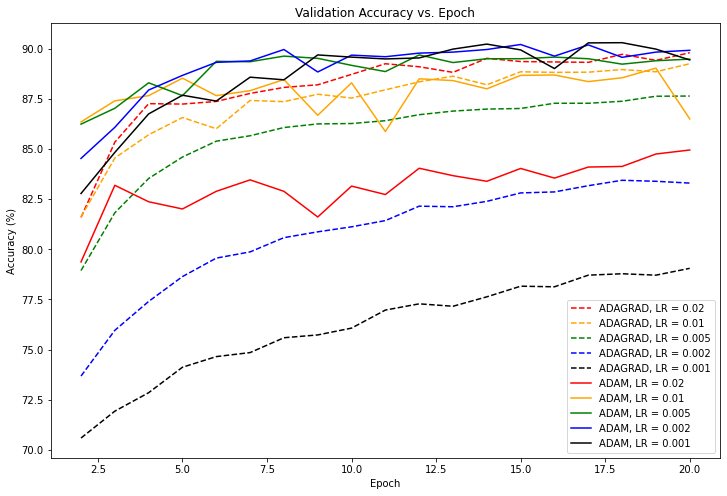

In [ ]:
import matplotlib.pyplot as plt

def plot_accuracies(accuracies, title):
    fig, ax = plt.subplots(figsize =(12, 8)) 

    colors = ["red","orange","green","blue","black"]
    
    #Don't plot the first epoch
    for (lr, acc),color in zip(accuracies[1].items(),colors):
        plt.plot(range(2, num_epochs + 1), acc[1:], '--',color=color,label=f"ADAGRAD, LR = {lr}")
    for (lr, acc),color in zip(accuracies[0].items(),colors):
        plt.plot(range(2, num_epochs + 1), acc[1:], color=color,label=f"ADAM, LR = {lr}")


    plt.xlabel("Epoch")
    plt.ylabel("Accuracy (%)")
    plt.title(title)
    plt.legend()
    plt.show()

# Plot the validation accuracies
plot_accuracies(val_accuracies_ver1, "Validation Accuracy vs. Epoch")

In [ ]:
#save to prevent accidental overwriteing (the above took an hour to run)
print("TOP Accuracy with ADAM Model")
for key, value in val_accuracies_ver1[0].items():
  print("\t With Learning Rate = {} .... {:.2f}% ".format(key,max(value)))

print("TOP Accuracy with ADAGRAD Model")
for key, value in val_accuracies_ver1[1].items():
  print("\t With Learning Rate = {} .... {:.2f}% ".format(key,max(value)))

TOP Accuracy with ADAM Model
	 With Learning Rate = 0.02 .... 84.95% 
	 With Learning Rate = 0.01 .... 89.03% 
	 With Learning Rate = 0.005 .... 89.69% 
	 With Learning Rate = 0.002 .... 90.21% 
	 With Learning Rate = 0.001 .... 90.30% 
TOP Accuracy with ADAGRAD Model
	 With Learning Rate = 0.02 .... 89.80% 
	 With Learning Rate = 0.01 .... 89.25% 
	 With Learning Rate = 0.005 .... 87.64% 
	 With Learning Rate = 0.002 .... 83.44% 
	 With Learning Rate = 0.001 .... 79.05% 


In [ ]:
""""
From above, we see we achieve good results (>90%) using the ADAM model and a low (0.002 or 0.001) learning rate

In general, the ADAM optimzer performed better than ADAGRAD, which makes sense as ADAGRAD is 
well suited to avoid saddle points, but is somewhat slowe than ADAM. I suspect that if I 
had ran for many more epochs, ADAGRAD would converge to ADAM's results, and indeed that seems reasonable
for high inital parameter learing rates for ADAGRAD

Adjusting the learning rate helped tune the system above the 90% threshold, in particular moving to a lower
learing rate for ADAM helped achieve this to slowly arrive at optimum values without overshooting and bouncing around
the minimum in parameter space. Conversely, ADAGRAD benefitted from a larger initial learning rate, but I suspect 
this wouldn't matter given enough epochs. 
"""